# Home field advantage analysis

# Functions

In [42]:
using CSV
using DataFrames
using Plots
using Statistics
using StatsPlots

In [43]:
# defining functions that allow for different home field advantage measures and the creation of a league table for soccer

In [44]:
function pointH(x::String1)
    if x == "H"
        return 3
    elseif x == "D"
        return 1
    else 
        return 0
    end
end

pointH (generic function with 1 method)

In [45]:
function pointA(x::String1)
    if x == "A"
        return 3
    elseif x == "D"
        return 1
    else 
        return 0
    end
end

pointA (generic function with 1 method)

In [46]:
function leaguetable(x::DataFrame)
    # select columns we will use
    LeagueSet = select(x, :Date, :HomeTeam, :AwayTeam, :FTR, :FTHG, :FTAG)
    # group by home and away teams
    teamsH = groupby(LeagueSet, :HomeTeam)
    teamsA = groupby(LeagueSet, :AwayTeam)
    gfHome = combine(teamsH, :FTHG => sum)
    gfHome =rename(gfHome, :HomeTeam => :Team)
    gfAway =combine(teamsA, :FTAG => sum)
    gfAway =rename(gfAway, :AwayTeam => :Team)
    gfTotal = innerjoin(gfHome, gfAway; on=:Team)
    gfTotal = rename(gfTotal, :FTHG_sum => :HG, :FTAG_sum => :AG)
    gfTotal.TG = gfTotal.HG + gfTotal.AG
    gaHome = combine(teamsH, :FTAG => sum)
    gaHome =rename(gaHome, :HomeTeam => :Team);
    gaAway = combine(teamsA, :FTHG => sum)
    gaAway =rename(gaAway, :AwayTeam => :Team);
    gdHome = innerjoin(gfHome, gaHome; on=:Team)
    gdHome = rename(gdHome, :FTHG_sum => :GFH, :FTAG_sum => :GAH);
    gdHome.GDTH = gdHome.GFH - gdHome.GAH;
    gdAway = innerjoin(gfAway, gaAway; on=:Team)
    gdAway = rename(gdAway, :FTAG_sum => :GFA, :FTHG_sum => :GAA);
    gdAway.GDTA = gdAway.GFA - gdAway.GAA;
    gdTotal = innerjoin(gdHome, gdAway; on=:Team);
    gdTotal.GF = gdTotal.GFH + gdTotal.GFA;
    gdTotal.GA = gdTotal.GAH + gdTotal.GAA;
    gdTotal.GD = gdTotal.GDTH + gdTotal.GDTA;
    LeagueSet.pointsH = pointH.(LeagueSet.FTR);
    LeagueSet.pointsA = pointA.(LeagueSet.FTR);
    ptsHome = combine(teamsH, :pointsH => sum)
    ptsHome =rename(ptsHome, :HomeTeam => :Team)
    ptsAway = combine(teamsA, :pointsA => sum)
    ptsAway =rename(ptsAway, :AwayTeam => :Team)
    ptsTotal = innerjoin(ptsHome, ptsAway; on=:Team)
    ptsTotal = rename(ptsTotal, :pointsH_sum => :PointsH, :pointsA_sum => :PointsA);
    Table = innerjoin(gdTotal, ptsTotal; on=:Team);
    Table.Points = Table.PointsH + Table.PointsA;
    Table = select(Table, :Team, :GF, :GA, :GD, :Points, :PointsH, :PointsA, :GDTH, :GDTA,:GFH, :GFA)
    Table = sort(Table, :Points, rev=true);
    Table.Games .= (size(Table,1)-1)*2
    Table = select(Table, :Team, :Games, :GF, :GA, :GD, :Points, :PointsH, :PointsA, :GDTH, :GDTA, :GFH, :GFA)
    Table.HFAdvPts = (Table.PointsH - Table.PointsA)./Table.Games;
    Table.HFAdvGD = (Table.GDTH - Table.GDTA)./Table.Games 
    Table.HFAdvGF = (Table.GFH - Table.GFA)./Table.Games
    Table.TSPts = (Table.Points)./Table.Games
    Table.TSGD = (Table.GD)./Table.Games
    Table = Table = select(Table, :Team, :Games, :GF, :GA, :GD, :Points, :HFAdvPts, :HFAdvGD, :HFAdvGF, :TSGD, :TSPts)
    return Table
end

leaguetable (generic function with 1 method)

In [47]:
function medianLeagueHFAdvPts(n::DataFrame)
    LeagueSet = select(n, :Date, :HomeTeam, :AwayTeam, :FTR,:FTHG, :FTAG)
    teamsH = groupby(LeagueSet, :HomeTeam)
    teamsA = groupby(LeagueSet, :AwayTeam)
    LeagueSet.pointsH = pointH.(LeagueSet.FTR);
    LeagueSet.pointsA = pointA.(LeagueSet.FTR);
    ptsHome = combine(teamsH, :pointsH => sum)
    ptsHome =rename(ptsHome, :HomeTeam => :Team)
    ptsAway = combine(teamsA, :pointsA => sum)
    ptsAway =rename(ptsAway, :AwayTeam => :Team)
    ptsTotal = innerjoin(ptsHome, ptsAway; on=:Team)
    ptsTotal = rename(ptsTotal, :pointsH_sum => :PointsH, :pointsA_sum => :PointsA);
    ptsTotal.Games .= (size(ptsTotal,1)-1)*2
    ptsTotal.HFAdvPts = (ptsTotal.PointsH - ptsTotal.PointsA)./ptsTotal.Games;
    return median(ptsTotal.HFAdvPts)
end

medianLeagueHFAdvPts (generic function with 1 method)

In [48]:
function medianLeagueHFAdvPts2(n::DataFrame)
    HFAdvPtsMedian = median(n.HFAdvPts)
    return HFAdvPtsMedian
end

medianLeagueHFAdvPts2 (generic function with 1 method)

In [49]:
function medianLeagueHFAdvGD(n::DataFrame)
    HFAdvGDMedian = median(n.HFAdvGD)
    return HFAdvGDMedian
end

medianLeagueHFAdvGD (generic function with 1 method)

In [50]:
function iqrLeagueHFAdvPts(n::DataFrame)
    HFAdvPtsIqr = iqr(n.HFAdvPts)
    return HFAdvPtsIqr
end

iqrLeagueHFAdvPts (generic function with 1 method)

In [51]:
function iqrLeagueHFAdvGD(n::DataFrame)
    HFAdvGDiqr = iqr(n.HFAdvGD)
    return HFAdvGDiqr
end

iqrLeagueHFAdvGD (generic function with 1 method)

In [52]:
function medianLeagueHFAdvGF(n::DataFrame)
    HFAdvGFMedian = median(n.HFAdvGF)
    return HFAdvGFMedian
end

medianLeagueHFAdvGF (generic function with 1 method)

In [53]:
function iqrLeagueHFAdvGF(n::DataFrame)
    HFAdvGFiqr = iqr(n.HFAdvGF)
    return HFAdvGFiqr
end

iqrLeagueHFAdvGF (generic function with 1 method)

In [54]:
function medianLeagueTSPts(n::DataFrame)
    TSPtsMedian = median(n.TSPts)
    return TSPtsMedian
end

medianLeagueTSPts (generic function with 1 method)

In [55]:
function iqrLeagueTSPts(n::DataFrame)
    TSPtsiqr = iqr(n.TSPts)
    return TSPtsiqr
end

iqrLeagueTSPts (generic function with 1 method)

In [56]:
function medianLeagueTSGD(n::DataFrame)
    TSGDMedian = median(n.TSGD)
    return TSGDMedian
end

medianLeagueTSGD (generic function with 1 method)

In [57]:
function iqrLeagueTSGD(n::DataFrame)
    TSGDiqr = iqr(n.TSGD)
    return TSGDiqr
end

iqrLeagueTSGD (generic function with 1 method)

In [58]:
CSV.read("Data/Soccer/England/1/2023.csv", DataFrame);

In [59]:
Prem2023= CSV.read("Data/Soccer/England/1/2023.csv", DataFrame);

In [60]:
Prem2022=CSV.read("Data/Soccer/England/1/2022.csv", DataFrame);

In [61]:
Prem2021=CSV.read("Data/Soccer/England/1/2021.csv", DataFrame);

In [62]:
Prem2020=CSV.read("Data/Soccer/England/1/2020.csv", DataFrame);

In [63]:
Prem2019 = CSV.read("Data/Soccer/England/1/2019.csv", DataFrame);

In [64]:
TablePrem2023 = leaguetable(Prem2023);

In [65]:
TablePrem2022 = leaguetable(Prem2022);

In [66]:
TablePrem2021 = leaguetable(Prem2021);

In [67]:
TablePrem2020 = leaguetable(Prem2020);

In [68]:
TablePrem2019 = leaguetable(Prem2019);

In [69]:
Bundes2023=CSV.read("Data/Soccer/Germany/1/2023.csv", DataFrame);

In [70]:
TableBundes2023 = leaguetable(Bundes2023);

In [71]:
function LeagueHFAdv(x::DataFrame)
    y = leaguetable(x)
    HFAdv = select(y, :Team, :Points, :HFAdvPts, :HFAdvGD,:HFAdvGF)
    HFAdvPtsMean = mean(HFAdv[!, :HFAdvPts])
    HFAdvGDMean = mean(HFAdv[!, :HFAdvGD])
    HFAdvGFMean = mean(HFAdv[!, :HFAdvGF])
    HFAdvPtsVar = var(HFAdv[!, :HFAdvPts])
    HFAdvGDVar = var(HFAdv[!, :HFAdvGD])
    HFAdvGFVar = var(HFAdv[!, :HFAdvGF])
    return (table=HFAdv, HFAdvPtsMean, HFAdvGDMean, HFAdvGFMean, HFAdvPtsVar, HFAdvGDVar, HFAdvGFVar)
end

LeagueHFAdv (generic function with 1 method)

In [72]:
Prem2023Summary = LeagueHFAdv(Prem2023);

In [73]:
using StatsPlots

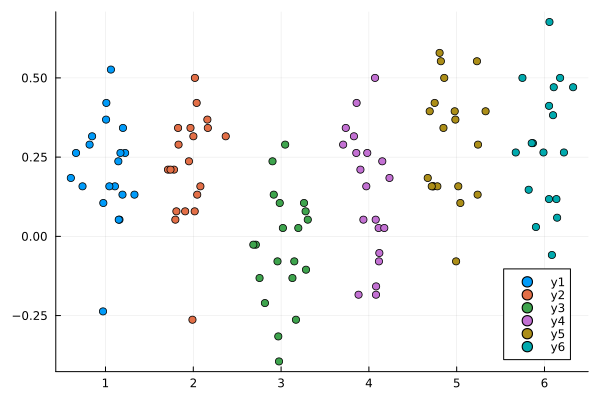

In [74]:
dotplot(TablePrem2019.HFAdvPts)
dotplot!(TablePrem2020.HFAdvPts)
dotplot!(TablePrem2021.HFAdvPts)
dotplot!(TablePrem2022.HFAdvPts)
dotplot!(TablePrem2023.HFAdvPts)
dotplot!(TableBundes2023.HFAdvPts)

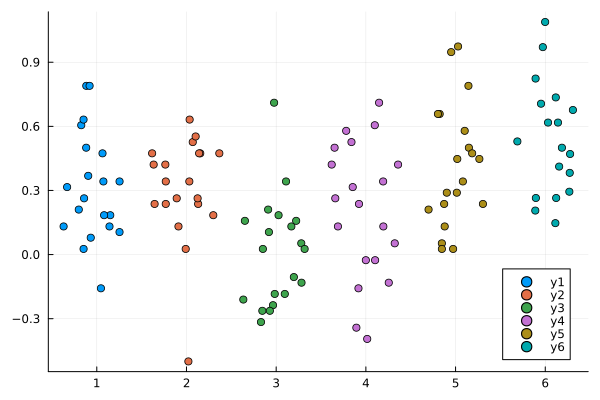

In [75]:
dotplot(TablePrem2019.HFAdvGD)
dotplot!(TablePrem2020.HFAdvGD)
dotplot!(TablePrem2021.HFAdvGD)
dotplot!(TablePrem2022.HFAdvGD)
dotplot!(TablePrem2023.HFAdvGD)
dotplot!(TableBundes2023.HFAdvGD)

# Creation of Soccer Master Table

In [77]:
Country = ["England", "France", "Germany", "Italy", "Spain", "USA"]
Division = ["1" "2" "3" "4"]
Year  = ["2023" "2022" "2021" "2020" "2019" "2018" "2017" "2016" "2015" "2014" "2013" "2012" "2011" "2010" "2009" "2008" "2007" "2006" "2005" "2004"]
CountryDivision ="Data/Soccer/" .* Country .* "/" .* Division
vec(CountryDivision)
dontexist = ["Data/Soccer/USA/2", "Data/Soccer/France/3", "Data/Soccer/Germany/3", "Data/Soccer/Italy/3", "Data/Soccer/USA/3", "Data/Soccer/Spain/3",  "Data/Soccer/France/4", "Data/Soccer/Germany/4"
,"Data/Soccer/Italy/4", "Data/Soccer/Spain/4","Data/Soccer/USA/4"]
CountryDivision = filter(x -> !(x in dontexist), CountryDivision)
FileName = CountryDivision .* "/" .* Year .* ".csv"

13×20 Matrix{String}:
 "Data/Soccer/England/1/2023.csv"  …  "Data/Soccer/England/1/2004.csv"
 "Data/Soccer/France/1/2023.csv"      "Data/Soccer/France/1/2004.csv"
 "Data/Soccer/Germany/1/2023.csv"     "Data/Soccer/Germany/1/2004.csv"
 "Data/Soccer/Italy/1/2023.csv"       "Data/Soccer/Italy/1/2004.csv"
 "Data/Soccer/Spain/1/2023.csv"       "Data/Soccer/Spain/1/2004.csv"
 "Data/Soccer/USA/1/2023.csv"      …  "Data/Soccer/USA/1/2004.csv"
 "Data/Soccer/England/2/2023.csv"     "Data/Soccer/England/2/2004.csv"
 "Data/Soccer/France/2/2023.csv"      "Data/Soccer/France/2/2004.csv"
 "Data/Soccer/Germany/2/2023.csv"     "Data/Soccer/Germany/2/2004.csv"
 "Data/Soccer/Italy/2/2023.csv"       "Data/Soccer/Italy/2/2004.csv"
 "Data/Soccer/Spain/2/2023.csv"    …  "Data/Soccer/Spain/2/2004.csv"
 "Data/Soccer/England/3/2023.csv"     "Data/Soccer/England/3/2004.csv"
 "Data/Soccer/England/4/2023.csv"     "Data/Soccer/England/4/2004.csv"

In [86]:
FileName = vec(FileName)
dontexist2 = "Data/Soccer/USA/1/2011.csv"
FileName = filter(x -> !(x in dontexist), FileName);
Country = repeat(["England","France","Germany","Italy","Spain","USA","England","France","Germany","Italy","Spain","England","England"], 20)
Division = repeat([1,1,1,1,1,1,2,2,2,2,2,3,4],20)
Year1 = repeat([2023],13)
Year2 = repeat([2022],13)
Year3 = repeat([2021],13)
Year4 = repeat([2020],13)
Year5 = repeat([2019],13)
Year6 = repeat([2018],13)
Year7 = repeat([2017],13)
Year8 = repeat([2016],13)
Year9 = repeat([2015],13)
Year10 = repeat([2014],13)
Year11 = repeat([2013],13)
Year12 = repeat([2012],13)
Year13 = repeat([2011],13);
Year14 = repeat([2010],13);
Year15 = repeat([2009],13);
Year16 = repeat([2008],13);
Year17 = repeat([2007],13);
Year18 = repeat([2006],13);
Year19 = repeat([2005],13);
Year20 = repeat([2004],13);
Year = vcat(Year1,Year2,Year3,Year4,Year5,Year6,Year7,Year8,Year9,Year10,Year11,Year12,Year13,Year14,Year15,Year16,Year17,Year18,Year19,Year20);

In [180]:
fileList = DataFrame(Country=Country, Division=Division, Year=Year, FileName=FileName)

260×4 DataFrame
 Row │ Country  Division  Year   FileName                       
     │ String   Int64     Int64  String                         
─────┼──────────────────────────────────────────────────────────
   1 │ England         1   2023  Data/Soccer/England/1/2023.csv
   2 │ France          1   2023  Data/Soccer/France/1/2023.csv
   3 │ Germany         1   2023  Data/Soccer/Germany/1/2023.csv
   4 │ Italy           1   2023  Data/Soccer/Italy/1/2023.csv
   5 │ Spain           1   2023  Data/Soccer/Spain/1/2023.csv
   6 │ USA             1   2023  Data/Soccer/USA/1/2023.csv
   7 │ England         2   2023  Data/Soccer/England/2/2023.csv
   8 │ France          2   2023  Data/Soccer/France/2/2023.csv
   9 │ Germany         2   2023  Data/Soccer/Germany/2/2023.csv
  10 │ Italy           2   2023  Data/Soccer/Italy/2/2023.csv
  11 │ Spain           2   2023  Data/Soccer/Spain/2/2023.csv
  ⋮  │    ⋮        ⋮        ⋮                  ⋮
 251 │ Italy           1   2004  Data/Soccer/Italy/1/2004.csv
 252 │ Spain           1   2004  Data/Soccer/Spain/1/2004.csv
 253 │ USA             1   2004  Data/Soccer/USA/1/2004.csv
 254 │ England         2   2004  Data/Soccer/England/2/2004.csv
 255 │ France          2   2004  Data/Soccer/France/2/2004.csv
 256 │ Germany         2   2004  Data/Soccer/Germany/2/2004.csv
 257 │ Italy           2   2004  Data/Soccer/Italy/2/2004.csv
 258 │ Spain           2   2004  Data/Soccer/Spain/2/2004.csv
 259 │ England         3   2004  Data/Soccer/England/3/2004.csv
 260 │ England         4   2004  Data/Soccer/England/4/2004.csv
                                                239 rows omitted

In [189]:
englandFiles = subset(fileList, :Country => (c->c.=="England"));

In [190]:
spainFiles = subset(fileList, :Country => (c->c.=="Spain"));

In [205]:
function readFileSkipMissing(filename::String;silencewarnings=true)
    CSV.read(filename, DataFrame, ignoreemptyrows=true,silencewarnings=silencewarnings) |> (df->subset(df,:Date => (z->(!ismissing).(z))))
    
end

readFileSkipMissing (generic function with 1 method)

In [200]:
englandMasterTable = transform(englandFiles,:FileName => (files->readFileSkipMissing.(files)) => :df);

In [204]:
masterTableSoccer

260×5 DataFrame
 Row │ Country  Division  Year   FileName                        df            ⋯
     │ String   Int64     Int64  String                          DataFrame     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ England         1   2023  Data/Soccer/England/1/2023.csv  380×106 DataF ⋯
   2 │ France          1   2023  Data/Soccer/France/1/2023.csv   380×105 DataF
   3 │ Germany         1   2023  Data/Soccer/Germany/1/2023.csv  306×105 DataF
   4 │ Italy           1   2023  Data/Soccer/Italy/1/2023.csv    380×105 DataF
   5 │ Spain           1   2023  Data/Soccer/Spain/1/2023.csv    380×105 DataF ⋯
   6 │ USA             1   2023  Data/Soccer/USA/1/2023.csv      279×19 DataFr
   7 │ England         2   2023  Data/Soccer/England/2/2023.csv  552×106 DataF
   8 │ France          2   2023  Data/Soccer/France/2/2023.csv   379×105 DataF
   9 │ Germany         2   2023  Data/Soccer/Germany/2/2023.csv  306×105 DataF ⋯
  10 │ Italy           2   2023  Data/Soccer/Italy/2/2023.csv    380×105 DataF
  11 │ Spain           2   2023  Data/Soccer/Spain/2/2023.csv    462×105 DataF
  ⋮  │    ⋮        ⋮        ⋮                  ⋮                         ⋮     ⋱
 251 │ Italy           1   2004  Data/Soccer/Italy/1/2004.csv    306×51 DataFr
 252 │ Spain           1   2004  Data/Soccer/Spain/1/2004.csv    380×51 DataFr ⋯
 253 │ USA             1   2004  Data/Soccer/USA/1/2004.csv      158×209 DataF
 254 │ England         2   2004  Data/Soccer/England/2/2004.csv  552×57 DataFr
 255 │ France          2   2004  Data/Soccer/France/2/2004.csv   380×49 DataFr
 256 │ Germany         2   2004  Data/Soccer/Germany/2/2004.csv  306×47 DataFr ⋯
 257 │ Italy           2   2004  Data/Soccer/Italy/2/2004.csv    552×53 DataFr
 258 │ Spain           2   2004  Data/Soccer/Spain/2/2004.csv    462×43 DataFr
 259 │ England         3   2004  Data/Soccer/England/3/2004.csv  552×55 DataFr
 260 │ England         4   2004  Data/Soccer/England/4/2004.csv  552×54 DataFr ⋯
                                                   1 column and 239 rows omitted

In [217]:
masterTableSoccer = transform(fileList,:FileName => (files->readFileSkipMissing.(files)) => :df);

In [218]:
spainMasterTable = transform(spainFiles,:FileName => (files->readFileSkipMissing.(files)) => :df);

In [374]:
masterTableSoccer.LeagueTable = leaguetable.(masterTableSoccer.df);

LoadError: ArgumentError: column name "FTR" not found in the data frame; existing most similar names are: "FTAG", "FTHG" and "HTW"

In [220]:
CSV.read("Data/Soccer/Spain/2/2013.csv", DataFrame, ignoreemptyrows=true) |> (df->subset(df,:Date => (z->(!ismissing).(z))));

In [221]:
masterTableSoccer

260×5 DataFrame
 Row │ Country  Division  Year   FileName                        df            ⋯
     │ String   Int64     Int64  String                          DataFrame     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ England         1   2023  Data/Soccer/England/1/2023.csv  380×106 DataF ⋯
   2 │ France          1   2023  Data/Soccer/France/1/2023.csv   380×105 DataF
   3 │ Germany         1   2023  Data/Soccer/Germany/1/2023.csv  306×105 DataF
   4 │ Italy           1   2023  Data/Soccer/Italy/1/2023.csv    380×105 DataF
   5 │ Spain           1   2023  Data/Soccer/Spain/1/2023.csv    380×105 DataF ⋯
   6 │ USA             1   2023  Data/Soccer/USA/1/2023.csv      279×19 DataFr
   7 │ England         2   2023  Data/Soccer/England/2/2023.csv  552×106 DataF
   8 │ France          2   2023  Data/Soccer/France/2/2023.csv   379×105 DataF
   9 │ Germany         2   2023  Data/Soccer/Germany/2/2023.csv  306×105 DataF ⋯
  10 │ Italy           2   2023  Data/Soccer/Italy/2/2023.csv    380×105 DataF
  11 │ Spain           2   2023  Data/Soccer/Spain/2/2023.csv    462×105 DataF
  ⋮  │    ⋮        ⋮        ⋮                  ⋮                         ⋮     ⋱
 251 │ Italy           1   2004  Data/Soccer/Italy/1/2004.csv    306×51 DataFr
 252 │ Spain           1   2004  Data/Soccer/Spain/1/2004.csv    380×51 DataFr ⋯
 253 │ USA             1   2004  Data/Soccer/USA/1/2004.csv      158×209 DataF
 254 │ England         2   2004  Data/Soccer/England/2/2004.csv  552×57 DataFr
 255 │ France          2   2004  Data/Soccer/France/2/2004.csv   380×49 DataFr
 256 │ Germany         2   2004  Data/Soccer/Germany/2/2004.csv  306×47 DataFr ⋯
 257 │ Italy           2   2004  Data/Soccer/Italy/2/2004.csv    552×53 DataFr
 258 │ Spain           2   2004  Data/Soccer/Spain/2/2004.csv    462×43 DataFr
 259 │ England         3   2004  Data/Soccer/England/3/2004.csv  552×55 DataFr
 260 │ England         4   2004  Data/Soccer/England/4/2004.csv  552×54 DataFr ⋯
                                                   1 column and 239 rows omitted

## Creation of homefield advantage table for soccer

In [208]:
function iqr(data::Vector)
    sorted_data = sort(data)
    q1 = quantile(sorted_data, 0.25)
    q3 = quantile(sorted_data, 0.75)
    iqr = q3 - q1
    return iqr
end

iqr (generic function with 1 method)

In [209]:
iqr(TablePrem2023.HFAdvPts);

In [210]:
median(TablePrem2023.HFAdvPts);

In [211]:
medianLeagueHFAdvPts(Prem2023);

In [212]:
masterTableSoccer.HFAdvPtsMedian = medianLeagueHFAdvPts2.(masterTableSoccer.LeagueTable);

LoadError: ArgumentError: column name :LeagueTable not found in the data frame

In [213]:
@df subset(masterTableSoccer,:Country => (c->c.=="England")) dotplot(:Year,:HFAdvPtsMedian,mode=:none, label="England")
@df subset(masterTableSoccer,:Country => (c->c.=="Spain")) dotplot!(:Year,:HFAdvPtsMedian,mode=:none,label ="Spain")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany")) dotplot!(:Year,:HFAdvPtsMedian,mode=:none, label ="Germany")
@df subset(masterTableSoccer,:Country => (c->c.=="France")) dotplot!(:Year,:HFAdvPtsMedian,mode=:none, label ="France")
@df subset(masterTableSoccer,:Country => (c->c.=="Italy")) dotplot!(:Year,:HFAdvPtsMedian,mode=:none, label ="Italy")
xticks!(2011:2023)

LoadError: Cannot convert Symbol to series data for plotting

In [214]:
@df masterTableSoccer violin(:Year,:HFAdvPtsMedian,mode=:none, label="")
@df masterTableSoccer dotplot!(:Year,:HFAdvPtsMedian,mode=:none, label="")

xticks!(2011:2023)

LoadError: Cannot convert Symbol to series data for plotting

In [215]:
masterTableSoccer;

In [216]:
## Creation of a table with all homefield advantage measures for soccer

In [402]:
masterTableSoccer.HFAdvGDMedian = medianLeagueHFAdvGD.(masterTableSoccer.LeagueTable);

In [403]:
masterTableSoccer.HFAdvPtsIqr = iqrLeagueHFAdvPts.(masterTableSoccer.LeagueTable);

In [404]:
masterTableSoccer.HFAdvGDiqr = iqrLeagueHFAdvGD.(masterTableSoccer.LeagueTable);

In [405]:
masterTableSoccer.HFAdvGFMedian = medianLeagueHFAdvGF.(masterTableSoccer.LeagueTable);

In [406]:
masterTableSoccer.HFAdvGFiqr = iqrLeagueHFAdvGF.(masterTableSoccer.LeagueTable);

In [407]:
masterTableSoccer.TSPtsMedian = medianLeagueTSPts.(masterTableSoccer.LeagueTable);

In [408]:
masterTableSoccer.TSPtsiqr = iqrLeagueTSPts.(masterTableSoccer.LeagueTable);

In [409]:
masterTableSoccer.TSGDMedian = medianLeagueTSGD.(masterTableSoccer.LeagueTable);

In [410]:
masterTableSoccer.TSGDiqr = iqrLeagueTSGD.(masterTableSoccer.LeagueTable);

In [411]:
masterTableSoccer |> first

DataFrameRow
 Row │ Country  Division  Year   FileName                        df            ⋯
     │ String   Int64     Int64  String                          DataFrame     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ England         1   2023  Data/Soccer/England/1/2023.csv  380×107 DataF ⋯
                                                              13 columns omitted

In [412]:
hfAdvTable = select(masterTableSoccer, :Country, :Division, :Year, :HFAdvPtsMedian,:HFAdvGDMedian,:HFAdvGFMedian,:HFAdvPtsIqr,:HFAdvGDiqr,:HFAdvGFiqr,:TSPtsMedian,:TSPtsiqr,:TSGDMedian,:TSGDiqr)

168×13 DataFrame
 Row │ Country  Division  Year   HFAdvPtsMedian  HFAdvGDMedian  HFAdvGFMedian  ⋯
     │ String   Int64     Int64  Float64         Float64        Float64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ England         1   2023        0.315789       0.394737      0.144737   ⋯
   2 │ France          1   2023        0.131579       0.184211      0.0789474
   3 │ Germany         1   2023        0.279412       0.514706      0.294118
   4 │ Italy           1   2023        0.223684       0.263158      0.118421
   5 │ Spain           1   2023        0.302632       0.394737      0.223684   ⋯
   6 │ USA             1   2023        0.160714       0.196429      0.125
   7 │ England         2   2023        0.173913       0.25          0.0869565
   8 │ France          2   2023        0.276316       0.25          0.118421
   9 │ Germany         2   2023        0.279412       0.308824      0.117647   ⋯
  10 │ Italy           2   2023        0.236842       0.184211      0.131579
  11 │ Spain           2   2023        0.297619       0.309524      0.190476
  ⋮  │    ⋮        ⋮        ⋮          ⋮               ⋮              ⋮        ⋱
 159 │ Germany         1   2011        0.176471       0.367647      0.191176
 160 │ Italy           1   2011        0.276316       0.394737      0.197368   ⋯
 161 │ Spain           1   2011        0.421053       0.565789      0.25
 162 │ England         2   2011        0.206522       0.336957      0.195652
 163 │ France          2   2011        0.394737       0.486842      0.236842
 164 │ Germany         2   2011        0.352941       0.455882      0.205882   ⋯
 165 │ Italy           2   2011        0.297619       0.357143      0.202381
 166 │ Spain           2   2011        0.309524       0.488095      0.178571
 167 │ England         3   2011        0.23913        0.293478      0.076087
 168 │ England         4   2011        0.152174       0.195652      0.141304   ⋯
                                                  7 columns and 147 rows omitted

### Graphing of the different home fieled advantage metrics

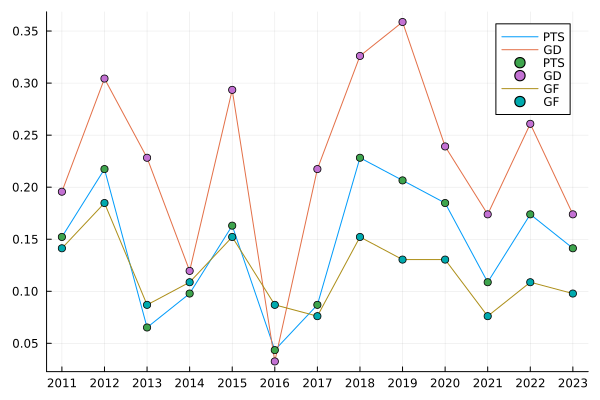

In [ ]:
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) plot(:Year,:HFAdvPtsMedian,mode=:none, label="PTS")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) plot!(:Year,:HFAdvGDMedian,mode=:none, label="GD")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) scatter!(:Year,:HFAdvPtsMedian,mode=:none, label="PTS")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) scatter!(:Year,:HFAdvGDMedian,mode=:none, label="GD")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) plot!(:Year,:HFAdvGFMedian,mode=:none, label="GF")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==4)) scatter!(:Year,:HFAdvGFMedian,mode=:none, label="GF")

xticks!(2011:2023)

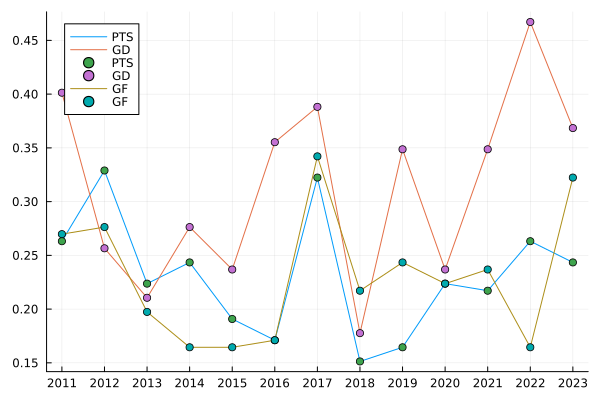

In [77]:
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot(:Year,:HFAdvPtsIqr,mode=:none, label="PTS")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot!(:Year,:HFAdvGDiqr,mode=:none, label="GD")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) scatter!(:Year,:HFAdvPtsIqr,mode=:none, label="PTS")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) scatter!(:Year,:HFAdvGDiqr,mode=:none, label="GD")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot!(:Year,:HFAdvGFiqr,mode=:none, label="GF")
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) scatter!(:Year,:HFAdvGFiqr,mode=:none, label="GF")

xticks!(2011:2023)

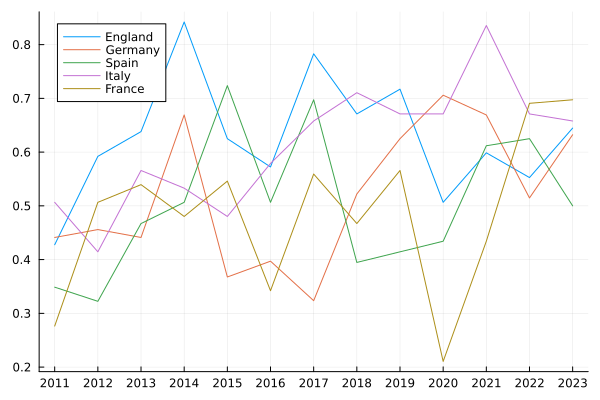

In [78]:
@df subset(hfAdvTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot(:Year,:TSPtsiqr,mode=:none, label="England")
@df subset(hfAdvTable,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) plot!(:Year,:TSPtsiqr,mode=:none, label="Germany")
@df subset(hfAdvTable,:Country => (c->c.=="Spain"), :Division =>(d->d.==1)) plot!(:Year,:TSPtsiqr,mode=:none, label="Spain")
@df subset(hfAdvTable,:Country => (c->c.=="Italy"), :Division =>(d->d.==1)) plot!(:Year,:TSPtsiqr,mode=:none, label="Italy")
@df subset(hfAdvTable,:Country => (c->c.=="France"), :Division =>(d->d.==1)) plot!(:Year,:TSPtsiqr,mode=:none, label="France")

xticks!(2011:2023)

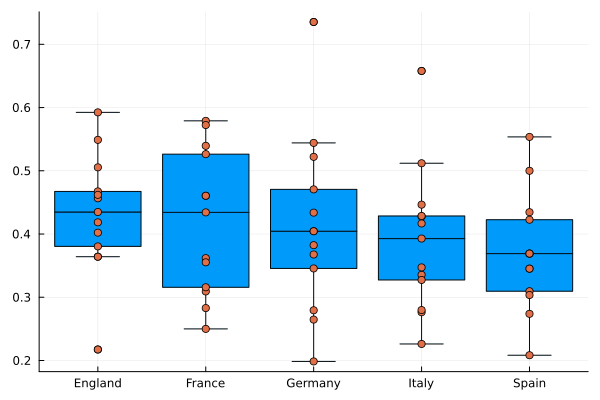

In [79]:
@df subset(hfAdvTable, :Division =>(d->d.==2)) boxplot(:Country,:TSPtsiqr,mode=:none,label="")
@df subset(hfAdvTable, :Division =>(d->d.==2)) dotplot!(:Country,:TSPtsiqr,mode=:none,label="")


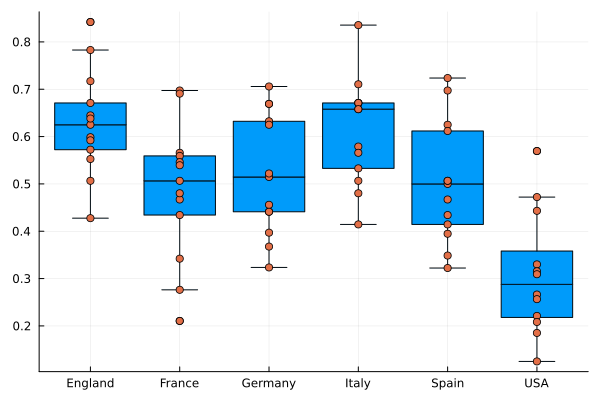

In [80]:
@df subset(hfAdvTable, :Division =>(d->d.==1)) boxplot(:Country,:TSPtsiqr,mode=:none,label="")
@df subset(hfAdvTable, :Division =>(d->d.==1)) dotplot!(:Country,:TSPtsiqr,mode=:none,label="")

# Home team win and competitiveness functions

In [95]:
nfl2022 = CSV.read("Data/NFL/2022.csv", DataFrame) |> (df->first(df,4))

4×14 DataFrame
 Row │ Week   Day      Date        Time     Winner/tie            Column6   Lo ⋯
     │ Int64  String3  Date        String7  String31              String1?  St ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1  Thu      2021-09-09  8:20PM   Tampa Bay Buccaneers  missing   Da ⋯
   2 │     1  Sun      2021-09-12  1:00PM   Philadelphia Eagles   @         At
   3 │     1  Sun      2021-09-12  1:00PM   Pittsburgh Steelers   @         Bu
   4 │     1  Sun      2021-09-12  1:00PM   Carolina Panthers     missing   Ne
                                                               8 columns omitted

In [222]:
function htwNFL(winner,loser,atsign)
    htw = ismissing(atsign) ? 1 : 0
    hometeam = (htw==1) ? winner : loser
    awayteam = (htw==0) ? winner : loser
    return (HTW=htw,HomeTeam=hometeam,AwayTeam=awayteam)
end

htwNFL (generic function with 2 methods)

In [223]:
function htwNFL(df::DataFrame)
    df = transform(df,[:("Winner/tie"),:("Loser/tie"),:("Column6")] => 
        ((w,l,a)->htwNFL.(w,l,a)) => :nested)
    transform!(df,:nested=>AsTable)
    return df
end

htwNFL (generic function with 2 methods)

In [224]:
a = transform(nfl2022,[:("Winner/tie"),:("Loser/tie"),:("Column6")] => ((w,l,a)->htwNFL.(w,l,a)) => :nested);

In [225]:
htwNFL(nfl2022)

4×18 DataFrame
 Row │ Week   Day      Date        Time     Winner/tie            Column6   Lo ⋯
     │ Int64  String3  Date        String7  String31              String1?  St ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1  Thu      2021-09-09  8:20PM   Tampa Bay Buccaneers  missing   Da ⋯
   2 │     1  Sun      2021-09-12  1:00PM   Philadelphia Eagles   @         At
   3 │     1  Sun      2021-09-12  1:00PM   Pittsburgh Steelers   @         Bu
   4 │     1  Sun      2021-09-12  1:00PM   Carolina Panthers     missing   Ne
                                                              12 columns omitted

In [226]:
transform(a,:nested=>AsTable)

4×18 DataFrame
 Row │ Week   Day      Date        Time     Winner/tie            Column6   Lo ⋯
     │ Int64  String3  Date        String7  String31              String1?  St ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1  Thu      2021-09-09  8:20PM   Tampa Bay Buccaneers  missing   Da ⋯
   2 │     1  Sun      2021-09-12  1:00PM   Philadelphia Eagles   @         At
   3 │     1  Sun      2021-09-12  1:00PM   Pittsburgh Steelers   @         Bu
   4 │     1  Sun      2021-09-12  1:00PM   Carolina Panthers     missing   Ne
                                                              12 columns omitted

In [227]:
x = collect(1:10)
@. ((x>5) ? 1 : 0)

LoadError: TypeError: non-boolean (BitVector) used in boolean context

In [229]:
transform!(nfl2022,[:("Winner/tie"),:("Column6"),:("Loser/tie")] => hometeam);

LoadError: UndefVarError: `hometeam` not defined

In [231]:
transform!(nfl2022,[:("Winner/tie"),:("Column6"),:("Loser/tie")] => awayteam );

LoadError: UndefVarError: `awayteam` not defined

In [232]:
function hometeamwin(a)
    ismissing(a) ? "h" : "a"
end

hometeamwin (generic function with 1 method)

In [233]:
transform(nfl2022,:Column6 .=> hometeamwin => :htw);

In [234]:
ismissing(missing)

true

In [235]:
epl2022 = CSV.read("Data/Soccer/England/1/2022.csv",DataFrame);

In [236]:
transform!(epl2022,:FTR => (x-> (x.=="H")) => :HTW);

In [237]:
select(epl2022,:FTR,:HTW)

380×2 DataFrame
 Row │ FTR      HTW   
     │ String1  Bool  
─────┼────────────────
   1 │ H         true
   2 │ H         true
   3 │ A        false
   4 │ H         true
   5 │ H         true
   6 │ H         true
   7 │ H         true
   8 │ A        false
   9 │ A        false
  10 │ H         true
  11 │ H         true
  ⋮  │    ⋮       ⋮
 371 │ H         true
 372 │ A        false
 373 │ H         true
 374 │ A        false
 375 │ H         true
 376 │ H         true
 377 │ H         true
 378 │ H         true
 379 │ H         true
 380 │ A        false
      359 rows omitted

In [238]:
using Pkg

In [239]:
Pkg.add("MixedModels")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [240]:
using MixedModels, FreqTables

In [241]:
using Pkg
Pkg.add("FreqTables")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [242]:
freqtable(epl2022.HTW)

2-element Named Vector{Int64}
Dim1  │ 
──────┼────
false │ 217
true  │ 163

## Application of the mixed model to esitmate competitivness and Home field advantage

In [456]:
out = fit(MixedModel,@formula(HTW~1+(1|fulldummy(HomeTeam))+(1|fulldummy(AwayTeam)),),epl2022,Bernoulli())

|             |    Est. |     SE |     z |      p | σ_HomeTeam | σ_AwayTeam |
|:----------- | -------:| ------:| -----:| ------:| ----------:| ----------:|
| (Intercept) | -0.3572 | 0.2582 | -1.38 | 0.1666 |     0.7697 |     0.6995 |


In [244]:
out |> println

Generalized Linear Mixed Model fit by maximum likelihood (nAGQ = 1)
  HTW ~ 1 + (1 | HomeTeam) + (1 | AwayTeam)
  Distribution: Bernoulli{Float64}
  Link: LogitLink()

   logLik    deviance     AIC       AICc        BIC    
  -244.1974   488.3948   494.3948   494.4586   506.2153

Variance components:
            Column   Variance Std.Dev. 
HomeTeam (Intercept)  0.592465 0.769718
AwayTeam (Intercept)  0.489324 0.699517

 Number of obs: 380; levels of grouping factors: 20, 20

Fixed-effects parameters:
──────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)
──────────────────────────────────────────────────
(Intercept)  -0.35717    0.258208  -1.38    0.1666
──────────────────────────────────────────────────


In [245]:
htw_epl2022 = select(epl2022, :Date, :HomeTeam, :AwayTeam, :FTHG, :FTAG, :FTR, :HTW)

380×7 DataFrame
 Row │ Date        HomeTeam        AwayTeam        FTHG   FTAG   FTR      HTW  ⋯
     │ String15    String15        String15        Int64  Int64  String1  Bool ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 13/08/2021  Brentford       Arsenal             2      0  H         tru ⋯
   2 │ 14/08/2021  Man United      Leeds               5      1  H         tru
   3 │ 14/08/2021  Burnley         Brighton            1      2  A        fals
   4 │ 14/08/2021  Chelsea         Crystal Palace      3      0  H         tru
   5 │ 14/08/2021  Everton         Southampton         3      1  H         tru ⋯
   6 │ 14/08/2021  Leicester       Wolves              1      0  H         tru
   7 │ 14/08/2021  Watford         Aston Villa         3      2  H         tru
   8 │ 14/08/2021  Norwich         Liverpool           0      3  A        fals
   9 │ 15/08/2021  Newcastle       West Ham            2      4  A        fals ⋯
  10 │ 15/08/2021  Tottenham       Man City            1      0  H         tru
  11 │ 21/08/2021  Liverpool       Burnley             2      0  H         tru
  ⋮  │     ⋮             ⋮               ⋮           ⋮      ⋮       ⋮       ⋮  ⋱
 371 │ 22/05/2022  Arsenal         Everton             5      1  H         tru
 372 │ 22/05/2022  Brentford       Leeds               1      2  A        fals ⋯
 373 │ 22/05/2022  Brighton        West Ham            3      1  H         tru
 374 │ 22/05/2022  Burnley         Newcastle           1      2  A        fals
 375 │ 22/05/2022  Chelsea         Watford             2      1  H         tru
 376 │ 22/05/2022  Crystal Palace  Man United          1      0  H         tru ⋯
 377 │ 22/05/2022  Leicester       Southampton         4      1  H         tru
 378 │ 22/05/2022  Liverpool       Wolves              3      1  H         tru
 379 │ 22/05/2022  Man City        Aston Villa         3      2  H         tru
 380 │ 22/05/2022  Norwich         Tottenham           0      5  A        fals ⋯
                                                   1 column and 359 rows omitted

In [300]:
function htwSoccer(x::DataFrame)
    htw = transform!(x,[:FTHG,:FTAG] => ((hg,ag) -> (hg.>ag)) => :HTW)
    subset!(x,:FTHG=> (x->((!ismissing).(x))))
    htw = select(htw, :Date, :HomeTeam, :AwayTeam, :FTHG, :FTAG, :HTW)
    return htw
end

htwSoccer (generic function with 1 method)

In [423]:
function htdwSoccer(x::DataFrame)
    htdw = transform!(x,[:FTHG,:FTAG] => ((hg,ag) -> (hg.>=ag)) => :HTDW)
    subset!(x,:FTHG=> (x->((!ismissing).(x))))
    htdw = select(htdw, :Date, :HomeTeam, :AwayTeam, :FTHG, :FTAG, :HTDW)
    return htdw
end

htdwSoccer (generic function with 1 method)

In [301]:
htwSoccer(epl2022)

380×6 DataFrame
 Row │ Date        HomeTeam        AwayTeam        FTHG   FTAG   HTW   
     │ String15    String15        String15        Int64  Int64  Bool  
─────┼─────────────────────────────────────────────────────────────────
   1 │ 13/08/2021  Brentford       Arsenal             2      0   true
   2 │ 14/08/2021  Man United      Leeds               5      1   true
   3 │ 14/08/2021  Burnley         Brighton            1      2  false
   4 │ 14/08/2021  Chelsea         Crystal Palace      3      0   true
   5 │ 14/08/2021  Everton         Southampton         3      1   true
   6 │ 14/08/2021  Leicester       Wolves              1      0   true
   7 │ 14/08/2021  Watford         Aston Villa         3      2   true
   8 │ 14/08/2021  Norwich         Liverpool           0      3  false
   9 │ 15/08/2021  Newcastle       West Ham            2      4  false
  10 │ 15/08/2021  Tottenham       Man City            1      0   true
  11 │ 21/08/2021  Liverpool       Burnley             2      0   true
  ⋮  │     ⋮             ⋮               ⋮           ⋮      ⋮      ⋮
 371 │ 22/05/2022  Arsenal         Everton             5      1   true
 372 │ 22/05/2022  Brentford       Leeds               1      2  false
 373 │ 22/05/2022  Brighton        West Ham            3      1   true
 374 │ 22/05/2022  Burnley         Newcastle           1      2  false
 375 │ 22/05/2022  Chelsea         Watford             2      1   true
 376 │ 22/05/2022  Crystal Palace  Man United          1      0   true
 377 │ 22/05/2022  Leicester       Southampton         4      1   true
 378 │ 22/05/2022  Liverpool       Wolves              3      1   true
 379 │ 22/05/2022  Man City        Aston Villa         3      2   true
 380 │ 22/05/2022  Norwich         Tottenham           0      5  false
                                                       359 rows omitted

In [303]:
htwSoccer.(masterTableSoccer.df);

In [248]:
nba2022 = CSV.read("Data/Basketball/NBA/2023.csv", DataFrame);

In [249]:
function htwNBA(x::DataFrame)
    subset!(x,:PTS=> (x->((!ismissing).(x))))
    htw = zeros(size(x,1))
    for i in 1:size(x,1)
        if x[i,:PTS] > x[i,:PTS_1]
            htw[i] = 0
        else 
            htw[i] = 1
        end
    end
    x.HTW = htw
    return x
end

htwNBA (generic function with 1 method)

In [250]:
htwNBA(nba2022);

In [251]:
nhl2022=CSV.read("Data/NHL/2023.csv", DataFrame);

In [252]:
function htwNHL(x::DataFrame)
    subset!(x,:G=> (x->((!ismissing).(x))))
    htw = zeros(size(x,1))
    for i in 1:size(x,1)
        if x[i,:G] > x[i,:G_1]
            htw[i] = 0
        else 
            htw[i] = 1
        end
    end
    x.HTW = htw
    return x
end

htwNHL (generic function with 1 method)

In [253]:
htwNHL(nhl2022);

In [392]:
acb2023=CSV.read("Data/Basketball/Liga ACB/2023.csv", DataFrame);

In [255]:
function htwBasket(x::DataFrame)
    subset!(x,:PTS=> (x->((!ismissing).(x))))
    htw = zeros(size(x,1))
    for i in 1:size(x,1)
        if x[i,:PTS] > x[i,:PTS_1]
            htw[i] = 0
        else 
            htw[i] = 1
        end
    end
    x.HTW = htw
    return x
end

htwBasket (generic function with 1 method)

In [256]:
acb2023=CSV.read("Data/Basketball/Liga ACB/2023.csv", DataFrame);
subset!(acb2023,:PTS=> (x->((!ismissing).(x))));
htwBasket(acb2023);

In [257]:
mlb2022 = CSV.read("Data/MLB/2022.csv",DataFrame,header=0);

In [258]:
mlb2022 |> nrow

2431

In [259]:
let
    out = fit(MixedModel,@formula(HTW~1+(1|fulldummy(Team))+(1|fulldummy(Opp)),),htwBasket(acb2023),Bernoulli())
end

|             |   Est. |     SE |    z |      p | σ_Team |  σ_Opp |
|:----------- | ------:| ------:| ----:| ------:| ------:| ------:|
| (Intercept) | 0.7384 | 0.3943 | 1.87 | 0.0611 | 1.0417 | 1.1620 |


In [260]:
out

|             |    Est. |     SE |     z |      p | σ_HomeTeam | σ_AwayTeam |
|:----------- | -------:| ------:| -----:| ------:| ----------:| ----------:|
| (Intercept) | -0.3572 | 0.2582 | -1.38 | 0.1666 |     0.7697 |     0.6995 |


In [342]:
coef(out)[1]

-0.35717005112273975

In [261]:
df = DataFrame(raneftables(out).HomeTeam);
var(df[:,2])

0.39095932267836525

In [262]:
acb2023[1:10,:];

In [413]:
vc = VarCorr(out)

|          | Column      |  Variance |  Std.Dev |
|:-------- |:----------- | ---------:| --------:|
| HomeTeam | (Intercept) |  0.592465 | 0.769718 |
| AwayTeam | (Intercept) |  0.489324 | 0.699517 |


In [418]:
vc.σρ

(HomeTeam = (σ = (var"(Intercept)" = 0.7697176406954674,), ρ = ()), AwayTeam = (σ = (var"(Intercept)" = 0.69951725258897,), ρ = ()))

## Functions for calculating competiveness from mixed models

In [378]:
function compBasket(x::DataFrame)
    comp = fit(MixedModel,@formula(HTW~1+(1|fulldummy(Team))+(1|fulldummy(Opp)),),htwBasket(x),Bernoulli())
    vc = VarCorr(comp)
    return (vc.σρ.Team.σ[1] + vc.σρ.Opp.σ[1])/2, coef(comp)[1]
end

compBasket (generic function with 1 method)

In [379]:
function compSoccer(x::DataFrame)
    comp = fit(MixedModel,@formula(HTW~1+(1|fulldummy(HomeTeam))+(1|fulldummy(AwayTeam)),),htwSoccer(x),Bernoulli())
    vc = VarCorr(comp)
    return (vc.σρ.HomeTeam.σ[1] + vc.σρ.AwayTeam.σ[1])/2, coef(comp)[1]
end

compSoccer (generic function with 1 method)

In [426]:
function compSoccerWithDraw(x::DataFrame)
    outWin = fit(MixedModel,@formula(HTW~1+(1|fulldummy(HomeTeam))+(1|fulldummy(AwayTeam)),),htwSoccer(x),Bernoulli())
    # check below
    outLoss = fit(MixedModel,@formula(HTDW~1+(1|fulldummy(HomeTeam))+(1|fulldummy(AwayTeam)),),htdwSoccer(x),Bernoulli())
    vcWin = VarCorr(outWin)
    vcLoss = VarCorr(outLoss)
    comp = (vcWin.σρ.HomeTeam.σ[1] + vcWin.σρ.AwayTeam.σ[1]+
        vcLoss.σρ.HomeTeam.σ[1] + vcLoss.σρ.AwayTeam.σ[1])/4
    return comp, (coef(outWin)[1]+coef(outLoss)[1])/2
end

compSoccerWithDraw (generic function with 1 method)

In [380]:
function compNHL(x::DataFrame)
    comp = fit(MixedModel,@formula(HTW~1+(1|fulldummy(Home))+(1|fulldummy(Visitor)),),htwNHL(x),Bernoulli())
    vc = VarCorr(comp)
    return (vc.σρ.Home.σ[1] + vc.σρ.Visitor.σ[1])/2, coef(comp)[1]
end

compNHL (generic function with 1 method)

In [381]:
function compMLB(x::DataFrame)
    comp = fit(MixedModel,@formula(HTW~1+(1|fulldummy(HomeTeam))+(1|fulldummy(AwayTeam)),),htwMLB(x),Bernoulli())
    vc = VarCorr(comp)
    return (vc.σρ.HomeTeam.σ[1] + vc.σρ.AwayTeam.σ[1])/2, coef(comp)[1]
end

compMLB (generic function with 1 method)

In [382]:
function compNFL(x::DataFrame)
    comp = fit(MixedModel,@formula(HTW~1+(1|fulldummy(HomeTeam))+(1|fulldummy(AwayTeam)),),htwNFL(x),Bernoulli())
    vc = VarCorr(comp)
    return (vc.σρ.HomeTeam.σ[1] + vc.σρ.AwayTeam.σ[1])/2, coef(comp)[1]
end

compNFL (generic function with 1 method)

In [294]:
comp = fit(MixedModel,@formula(HTW~1+(1|fulldummy(HomeTeam))+(1|fulldummy(AwayTeam)),),htwSoccer(epl2022),Bernoulli())

|             |    Est. |     SE |     z |      p | σ_HomeTeam | σ_AwayTeam |
|:----------- | -------:| ------:| -----:| ------:| ----------:| ----------:|
| (Intercept) | -0.3572 | 0.2582 | -1.38 | 0.1666 |     0.7697 |     0.6995 |


In [427]:
compSoccerWithDraw(epl2022)

(0.7804427671192733, 0.24269784245508827)

In [428]:
compSoccer(epl2022)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/sN2xr/src/ProgressMeter.jl:618
Minimizing 56 	 Time: 0:00:00 ( 4.78 ms/it)


(0.7346174466422187, -0.35717005112273975)

In [295]:
a = VarCorr(out)

|          | Column      |  Variance |  Std.Dev |
|:-------- |:----------- | ---------:| --------:|
| HomeTeam | (Intercept) |  0.592465 | 0.769718 |
| AwayTeam | (Intercept) |  0.489324 | 0.699517 |


In [288]:
(a.σρ.HomeTeam.σ[1], a.σρ.AwayTeam.σ[1]).^2


(0.5924652463977967, 0.48932438666962086)

# Plots of competitiveness and home field advantage

In [429]:
masterTableSoccer = transform(masterTableSoccer,:df => (d->compSoccerWithDraw.(d))=>[:Comp,:HFA])

260×7 DataFrame
 Row │ Country  Division  Year   FileName                        df            ⋯
     │ String   Int64     Int64  String                          DataFrame     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ England         1   2023  Data/Soccer/England/1/2023.csv  380×109 DataF ⋯
   2 │ France          1   2023  Data/Soccer/France/1/2023.csv   380×108 DataF
   3 │ Germany         1   2023  Data/Soccer/Germany/1/2023.csv  306×108 DataF
   4 │ Italy           1   2023  Data/Soccer/Italy/1/2023.csv    380×108 DataF
   5 │ Spain           1   2023  Data/Soccer/Spain/1/2023.csv    380×108 DataF ⋯
   6 │ USA             1   2023  Data/Soccer/USA/1/2023.csv      279×22 DataFr
   7 │ England         2   2023  Data/Soccer/England/2/2023.csv  552×109 DataF
   8 │ France          2   2023  Data/Soccer/France/2/2023.csv   379×108 DataF
   9 │ Germany         2   2023  Data/Soccer/Germany/2/2023.csv  306×108 DataF ⋯
  10 │ Italy           2   2023  Data/Soccer/Italy/2/2023.csv    380×108 DataF
  11 │ Spain           2   2023  Data/Soccer/Spain/2/2023.csv    462×108 DataF
  ⋮  │    ⋮        ⋮        ⋮                  ⋮                         ⋮     ⋱
 251 │ Italy           1   2004  Data/Soccer/Italy/1/2004.csv    306×53 DataFr
 252 │ Spain           1   2004  Data/Soccer/Spain/1/2004.csv    380×53 DataFr ⋯
 253 │ USA             1   2004  Data/Soccer/USA/1/2004.csv      158×211 DataF
 254 │ England         2   2004  Data/Soccer/England/2/2004.csv  552×59 DataFr
 255 │ France          2   2004  Data/Soccer/France/2/2004.csv   380×51 DataFr
 256 │ Germany         2   2004  Data/Soccer/Germany/2/2004.csv  306×49 DataFr ⋯
 257 │ Italy           2   2004  Data/Soccer/Italy/2/2004.csv    552×55 DataFr
 258 │ Spain           2   2004  Data/Soccer/Spain/2/2004.csv    462×45 DataFr
 259 │ England         3   2004  Data/Soccer/England/3/2004.csv  552×57 DataFr
 260 │ England         4   2004  Data/Soccer/England/4/2004.csv  552×56 DataFr ⋯
                                                  3 columns and 239 rows omitted

In [430]:
masterTableSoccer;

## Competitivenss plots of top soccer leagues

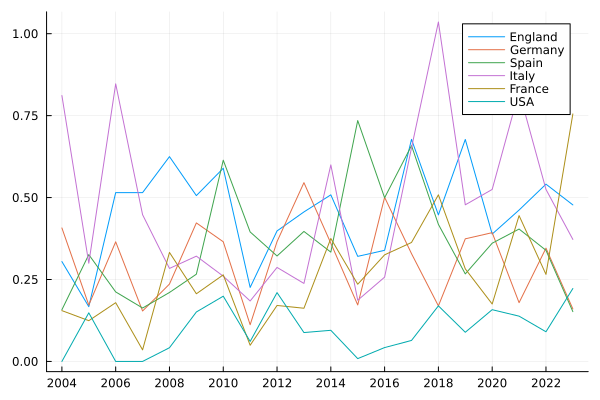

In [308]:
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="England")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="Germany")
@df subset(masterTableSoccer,:Country => (c->c.=="Spain"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="Spain")
@df subset(masterTableSoccer,:Country => (c->c.=="Italy"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="Italy")
@df subset(masterTableSoccer,:Country => (c->c.=="France"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="France")
@df subset(masterTableSoccer,:Country => (c->c.=="USA"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="USA")

xticks!(2004:2:2023)

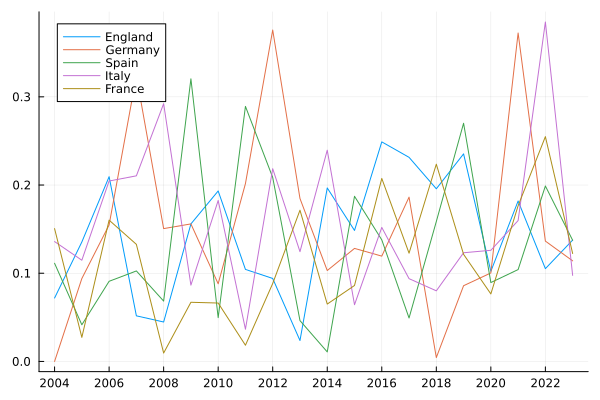

In [309]:
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==2)) plot(:Year,:Comp,mode=:none, label="England")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==2)) plot!(:Year,:Comp,mode=:none, label="Germany")
@df subset(masterTableSoccer,:Country => (c->c.=="Spain"), :Division =>(d->d.==2)) plot!(:Year,:Comp,mode=:none, label="Spain")
@df subset(masterTableSoccer,:Country => (c->c.=="Italy"), :Division =>(d->d.==2)) plot!(:Year,:Comp,mode=:none, label="Italy")
@df subset(masterTableSoccer,:Country => (c->c.=="France"), :Division =>(d->d.==2)) plot!(:Year,:Comp,mode=:none, label="France")

xticks!(2004:2:2023)

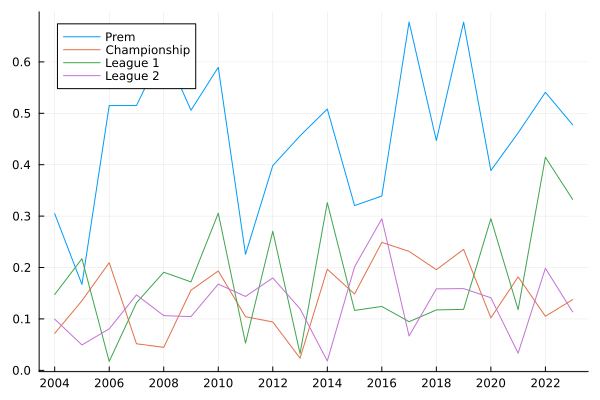

In [310]:
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="Prem")
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==2)) plot!(:Year,:Comp,mode=:none, label="Championship")
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==3)) plot!(:Year,:Comp,mode=:none, label="League 1")
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==4)) plot!(:Year,:Comp,mode=:none, label="League 2")

xticks!(2004:2:2023)

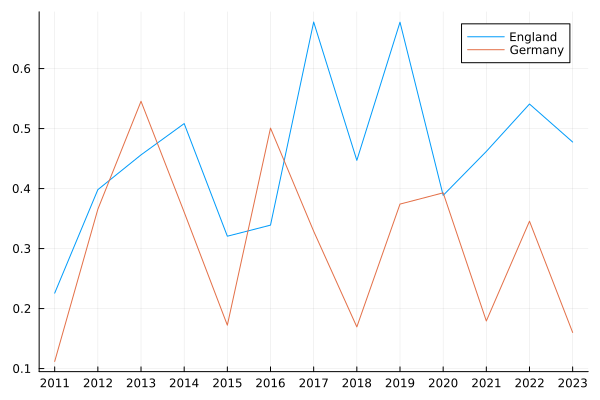

In [168]:
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="England")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="Germany")

xticks!(2011:2023)

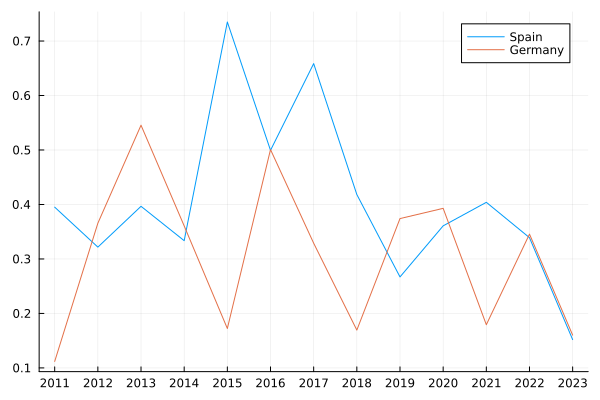

In [169]:
@df subset(masterTableSoccer,:Country => (c->c.=="Spain"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="Spain")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="Germany")

xticks!(2011:2023)

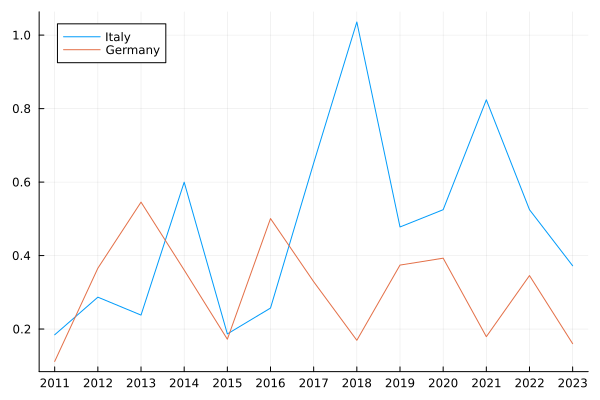

In [170]:
@df subset(masterTableSoccer,:Country => (c->c.=="Italy"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="Italy")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="Germany")

xticks!(2011:2023)

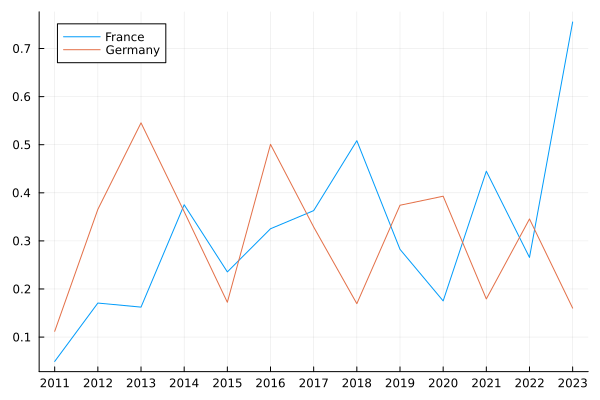

In [171]:
@df subset(masterTableSoccer,:Country => (c->c.=="France"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="France")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="Germany")

xticks!(2011:2023)

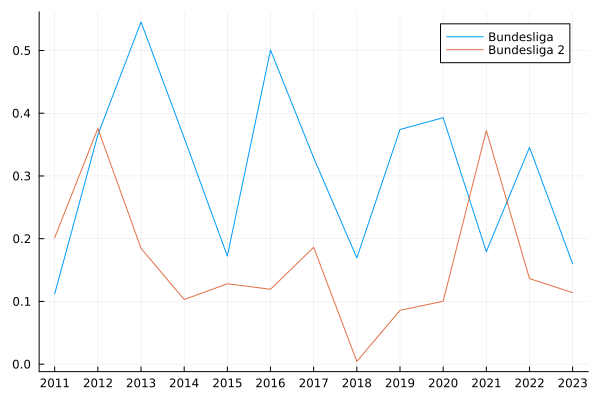

In [172]:
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="Bundesliga")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==2)) plot!(:Year,:Comp,mode=:none, label="Bundesliga 2")

xticks!(2011:2023)

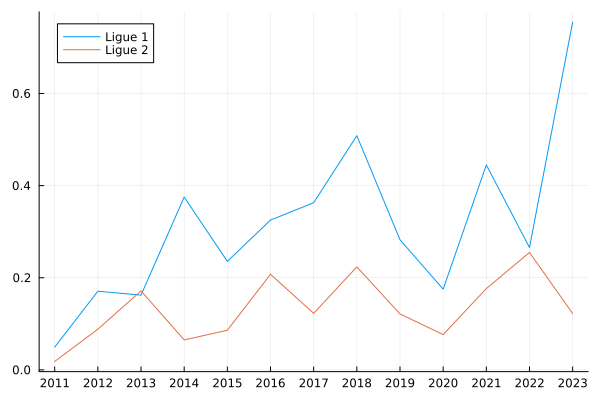

In [173]:
@df subset(masterTableSoccer,:Country => (c->c.=="France"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="Ligue 1")
@df subset(masterTableSoccer,:Country => (c->c.=="France"), :Division =>(d->d.==2)) plot!(:Year,:Comp,mode=:none, label="Ligue 2")

xticks!(2011:2023)

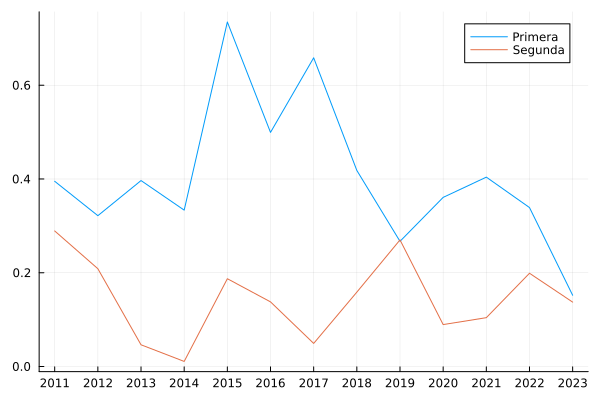

In [174]:
@df subset(masterTableSoccer,:Country => (c->c.=="Spain"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="Primera")
@df subset(masterTableSoccer,:Country => (c->c.=="Spain"), :Division =>(d->d.==2)) plot!(:Year,:Comp,mode=:none, label="Segunda")

xticks!(2011:2023)

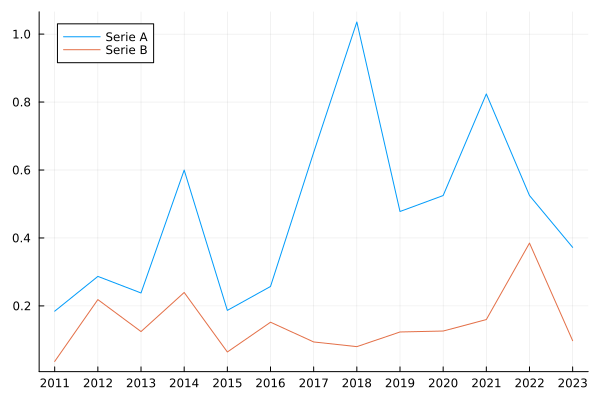

In [175]:
@df subset(masterTableSoccer,:Country => (c->c.=="Italy"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="Serie A")
@df subset(masterTableSoccer,:Country => (c->c.=="Italy"), :Division =>(d->d.==2)) plot!(:Year,:Comp,mode=:none, label="Serie B")

xticks!(2011:2023)

## Creation of basketball mastertable

In [152]:
league = ["CBA","GBL","Liga ACB","LNB","NBA","NBL"];
years = ["2023" "2022" "2021" "2020" "2019" "2018" "2017" "2016" "2015" "2014" "2013" "2012"];
filecalls = "Data/Basketball/".* league .* "/" .* years .* ".csv";
filecalls = vec(filecalls);
league = repeat(league, 12);
years23 = repeat([2023], 6)
years22 = repeat([2022], 6)
years21 = repeat([2021], 6)
years20 = repeat([2020], 6)
years19 = repeat([2019], 6)
years18 = repeat([2018], 6)
years17 = repeat([2017], 6)
years16 = repeat([2016], 6)
years15 = repeat([2015], 6)
years14 = repeat([2014], 6)
years13 = repeat([2013], 6)
years12 = repeat([2012], 6)
years = vcat(years23,years22,years21,years20,years19,years18,years17,years16,years15,years14,years13,years12);

In [153]:
fileListBasketball = DataFrame(League=league, Year=years, FileName=filecalls)

72×3 DataFrame
 Row │ League    Year   FileName                          
     │ String    Int64  String                            
─────┼────────────────────────────────────────────────────
   1 │ CBA        2023  Data/Basketball/CBA/2023.csv
   2 │ GBL        2023  Data/Basketball/GBL/2023.csv
   3 │ Liga ACB   2023  Data/Basketball/Liga ACB/2023.csv
   4 │ LNB        2023  Data/Basketball/LNB/2023.csv
   5 │ NBA        2023  Data/Basketball/NBA/2023.csv
   6 │ NBL        2023  Data/Basketball/NBL/2023.csv
   7 │ CBA        2022  Data/Basketball/CBA/2022.csv
   8 │ GBL        2022  Data/Basketball/GBL/2022.csv
   9 │ Liga ACB   2022  Data/Basketball/Liga ACB/2022.csv
  10 │ LNB        2022  Data/Basketball/LNB/2022.csv
  11 │ NBA        2022  Data/Basketball/NBA/2022.csv
  ⋮  │    ⋮        ⋮                    ⋮
  63 │ Liga ACB   2013  Data/Basketball/Liga ACB/2013.csv
  64 │ LNB        2013  Data/Basketball/LNB/2013.csv
  65 │ NBA        2013  Data/Basketball/NBA/2013.csv
  66 │ NBL        2013  Data/Basketball/NBL/2013.csv
  67 │ CBA        2012  Data/Basketball/CBA/2012.csv
  68 │ GBL        2012  Data/Basketball/GBL/2012.csv
  69 │ Liga ACB   2012  Data/Basketball/Liga ACB/2012.csv
  70 │ LNB        2012  Data/Basketball/LNB/2012.csv
  71 │ NBA        2012  Data/Basketball/NBA/2012.csv
  72 │ NBL        2012  Data/Basketball/NBL/2012.csv
                                           51 rows omitted

In [393]:
function readFileSkipMissingBasket(filename::String)
    if isnothing(match(r"/NBA/",filename))
        CSV.read(filename, DataFrame, ignoreemptyrows=true) |> (df->subset(df,:PTS => (z->(!ismissing).(z))))
    else
        frame = CSV.read(filename, DataFrame, ignoreemptyrows=true) |> (df->subset(df,:PTS => (z->(!ismissing).(z))))
        frame = rename(frame, Symbol("Visitor/Neutral") => :Opp, Symbol("Home/Neutral") => :Team)
    end
end

readFileSkipMissingBasket (generic function with 1 method)

In [312]:
CSV.read("Data/Basketball/NBA/2023.csv",DataFrame);

In [394]:
masterTableBasketball = transform(fileListBasketball,:FileName => (files->readFileSkipMissingBasket.(files)) => :df)

72×4 DataFrame
 Row │ League    Year   FileName                           df                
     │ String    Int64  String                             DataFrame         
─────┼───────────────────────────────────────────────────────────────────────
   1 │ CBA        2023  Data/Basketball/CBA/2023.csv       411×9 DataFrame   
   2 │ GBL        2023  Data/Basketball/GBL/2023.csv       132×9 DataFrame   
   3 │ Liga ACB   2023  Data/Basketball/Liga ACB/2023.csv  306×9 DataFrame   
   4 │ LNB        2023  Data/Basketball/LNB/2023.csv       306×9 DataFrame   
   5 │ NBA        2023  Data/Basketball/NBA/2023.csv       1230×11 DataFrame 
   6 │ NBL        2023  Data/Basketball/NBL/2023.csv       140×9 DataFrame   
   7 │ CBA        2022  Data/Basketball/CBA/2022.csv       380×9 DataFrame   
   8 │ GBL        2022  Data/Basketball/GBL/2022.csv       156×9 DataFrame   
   9 │ Liga ACB   2022  Data/Basketball/Liga ACB/2022.csv  306×9 DataFrame   
  10 │ LNB        2022  Data/Basketball/LNB/2022.csv       323×9 DataFrame   
  11 │ NBA        2022  Data/Basketball/NBA/2022.csv       1230×11 DataFrame 
  ⋮  │    ⋮        ⋮                    ⋮                          ⋮
  63 │ Liga ACB   2013  Data/Basketball/Liga ACB/2013.csv  306×9 DataFrame   
  64 │ LNB        2013  Data/Basketball/LNB/2013.csv       240×9 DataFrame   
  65 │ NBA        2013  Data/Basketball/NBA/2013.csv       1229×11 DataFrame 
  66 │ NBL        2013  Data/Basketball/NBL/2013.csv       112×9 DataFrame   
  67 │ CBA        2012  Data/Basketball/CBA/2012.csv       272×9 DataFrame   
  68 │ GBL        2012  Data/Basketball/GBL/2012.csv       156×9 DataFrame   
  69 │ Liga ACB   2012  Data/Basketball/Liga ACB/2012.csv  306×9 DataFrame   
  70 │ LNB        2012  Data/Basketball/LNB/2012.csv       240×9 DataFrame   
  71 │ NBA        2012  Data/Basketball/NBA/2012.csv       990×11 DataFrame  
  72 │ NBL        2012  Data/Basketball/NBL/2012.csv       126×9 DataFrame   
                                                              51 rows omitted

In [395]:
masterTableBasketball = transform(masterTableBasketball,:df => (d->compBasket.(d))=>[:Comp,:HFA])

72×6 DataFrame
 Row │ League    Year   FileName                           df                  ⋯
     │ String    Int64  String                             DataFrame           ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CBA        2023  Data/Basketball/CBA/2023.csv       411×10 DataFrame    ⋯
   2 │ GBL        2023  Data/Basketball/GBL/2023.csv       132×10 DataFrame  
   3 │ Liga ACB   2023  Data/Basketball/Liga ACB/2023.csv  306×10 DataFrame  
   4 │ LNB        2023  Data/Basketball/LNB/2023.csv       306×10 DataFrame  
   5 │ NBA        2023  Data/Basketball/NBA/2023.csv       1230×12 DataFrame   ⋯
   6 │ NBL        2023  Data/Basketball/NBL/2023.csv       140×10 DataFrame  
   7 │ CBA        2022  Data/Basketball/CBA/2022.csv       380×10 DataFrame  
   8 │ GBL        2022  Data/Basketball/GBL/2022.csv       156×10 DataFrame  
   9 │ Liga ACB   2022  Data/Basketball/Liga ACB/2022.csv  306×10 DataFrame    ⋯
  10 │ LNB        2022  Data/Basketball/LNB/2022.csv       323×10 DataFrame  
  11 │ NBA        2022  Data/Basketball/NBA/2022.csv       1230×12 DataFrame 
  ⋮  │    ⋮        ⋮                    ⋮                          ⋮           ⋱
  63 │ Liga ACB   2013  Data/Basketball/Liga ACB/2013.csv  306×10 DataFrame  
  64 │ LNB        2013  Data/Basketball/LNB/2013.csv       240×10 DataFrame    ⋯
  65 │ NBA        2013  Data/Basketball/NBA/2013.csv       1229×12 DataFrame 
  66 │ NBL        2013  Data/Basketball/NBL/2013.csv       112×10 DataFrame  
  67 │ CBA        2012  Data/Basketball/CBA/2012.csv       272×10 DataFrame  
  68 │ GBL        2012  Data/Basketball/GBL/2012.csv       156×10 DataFrame    ⋯
  69 │ Liga ACB   2012  Data/Basketball/Liga ACB/2012.csv  306×10 DataFrame  
  70 │ LNB        2012  Data/Basketball/LNB/2012.csv       240×10 DataFrame  
  71 │ NBA        2012  Data/Basketball/NBA/2012.csv       990×12 DataFrame  
  72 │ NBL        2012  Data/Basketball/NBL/2012.csv       126×10 DataFrame    ⋯
                                                   2 columns and 51 rows omitted

In [386]:
masterTableBasketball

72×6 DataFrame
 Row │ League    Year   FileName                           df                  ⋯
     │ String    Int64  String                             DataFrame           ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CBA        2023  Data/Basketball/CBA/2023.csv       411×10 DataFrame    ⋯
   2 │ GBL        2023  Data/Basketball/GBL/2023.csv       132×10 DataFrame  
   3 │ Liga ACB   2023  Data/Basketball/Liga ACB/2023.csv  306×10 DataFrame  
   4 │ LNB        2023  Data/Basketball/LNB/2023.csv       306×10 DataFrame  
   5 │ NBA        2023  Data/Basketball/NBA/2023.csv       1230×12 DataFrame   ⋯
   6 │ NBL        2023  Data/Basketball/NBL/2023.csv       140×10 DataFrame  
   7 │ CBA        2022  Data/Basketball/CBA/2022.csv       380×10 DataFrame  
   8 │ GBL        2022  Data/Basketball/GBL/2022.csv       156×10 DataFrame  
   9 │ Liga ACB   2022  Data/Basketball/Liga ACB/2022.csv  306×10 DataFrame    ⋯
  10 │ LNB        2022  Data/Basketball/LNB/2022.csv       323×10 DataFrame  
  11 │ NBA        2022  Data/Basketball/NBA/2022.csv       1230×12 DataFrame 
  ⋮  │    ⋮        ⋮                    ⋮                          ⋮           ⋱
  63 │ Liga ACB   2013  Data/Basketball/Liga ACB/2013.csv  306×10 DataFrame  
  64 │ LNB        2013  Data/Basketball/LNB/2013.csv       240×10 DataFrame    ⋯
  65 │ NBA        2013  Data/Basketball/NBA/2013.csv       1229×12 DataFrame 
  66 │ NBL        2013  Data/Basketball/NBL/2013.csv       112×10 DataFrame  
  67 │ CBA        2012  Data/Basketball/CBA/2012.csv       272×10 DataFrame  
  68 │ GBL        2012  Data/Basketball/GBL/2012.csv       156×10 DataFrame    ⋯
  69 │ Liga ACB   2012  Data/Basketball/Liga ACB/2012.csv  306×10 DataFrame  
  70 │ LNB        2012  Data/Basketball/LNB/2012.csv       240×10 DataFrame  
  71 │ NBA        2012  Data/Basketball/NBA/2012.csv       990×12 DataFrame  
  72 │ NBL        2012  Data/Basketball/NBL/2012.csv       126×10 DataFrame    ⋯
                                                   2 columns and 51 rows omitted

## Competitivness plots of top basketball leagues and some soccer

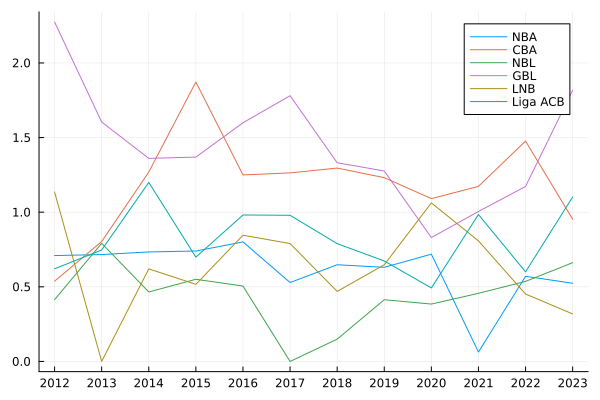

In [451]:
@df subset(masterTableBasketball,:League => (c->c.=="NBA")) plot(:Year,:Comp,mode=:none, label="NBA")
@df subset(masterTableBasketball,:League => (c->c.=="CBA")) plot!(:Year,:Comp,mode=:none, label="CBA")
@df subset(masterTableBasketball,:League => (c->c.=="NBL")) plot!(:Year,:Comp,mode=:none, label="NBL")
@df subset(masterTableBasketball,:League => (c->c.=="GBL")) plot!(:Year,:Comp,mode=:none, label="GBL")
@df subset(masterTableBasketball,:League => (c->c.=="LNB")) plot!(:Year,:Comp,mode=:none, label="LNB")
@df subset(masterTableBasketball,:League => (c->c.=="Liga ACB")) plot!(:Year,:Comp,mode=:none, label="Liga ACB")

xticks!(2012:2023)

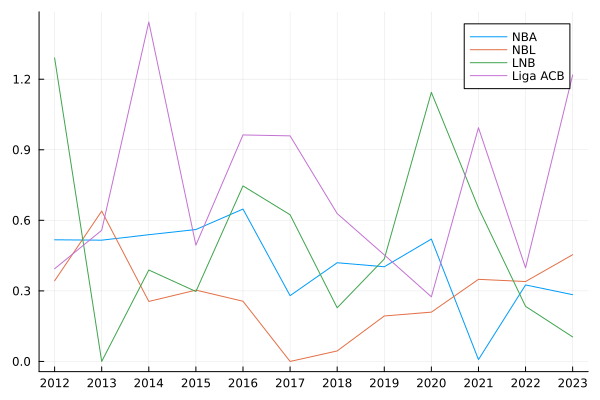

In [189]:
@df subset(masterTableBasketball,:League => (c->c.=="NBA")) plot(:Year,:Comp,mode=:none, label="NBA")
@df subset(masterTableBasketball,:League => (c->c.=="NBL")) plot!(:Year,:Comp,mode=:none, label="NBL")
@df subset(masterTableBasketball,:League => (c->c.=="LNB")) plot!(:Year,:Comp,mode=:none, label="LNB")
@df subset(masterTableBasketball,:League => (c->c.=="Liga ACB")) plot!(:Year,:Comp,mode=:none, label="Liga ACB")

xticks!(2012:2023)

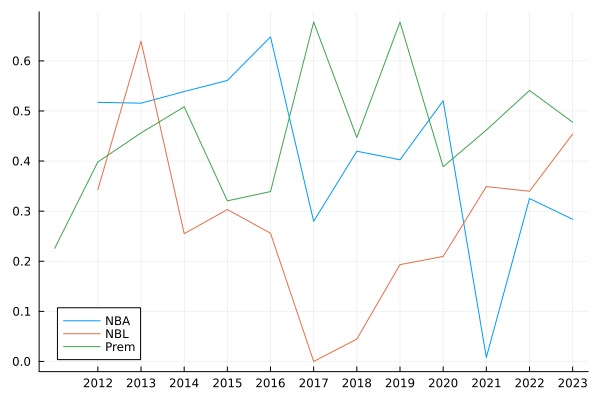

In [190]:
@df subset(masterTableBasketball,:League => (c->c.=="NBA")) plot(:Year,:Comp,mode=:none, label="NBA")
@df subset(masterTableBasketball,:League => (c->c.=="NBL")) plot!(:Year,:Comp,mode=:none, label="NBL")
@df subset(masterTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="Prem")

xticks!(2012:2023)

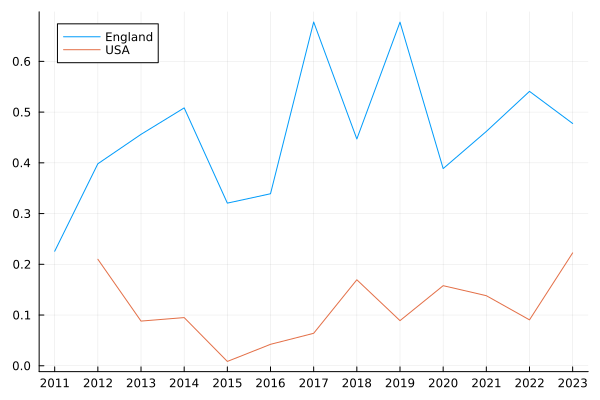

In [191]:
@df subset(masterTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="England")
@df subset(masterTable,:Country => (c->c.=="USA"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="USA")

xticks!(2011:2023)

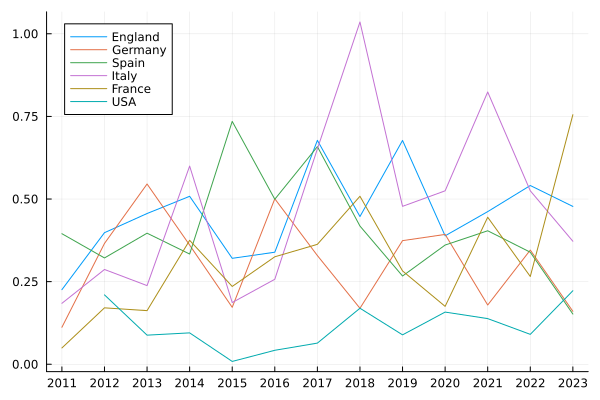

In [192]:
@df subset(masterTable,:Country => (c->c.=="England"), :Division =>(d->d.==1)) plot(:Year,:Comp,mode=:none, label="England")
@df subset(masterTable,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="Germany")
@df subset(masterTable,:Country => (c->c.=="Spain"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="Spain")
@df subset(masterTable,:Country => (c->c.=="Italy"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="Italy")
@df subset(masterTable,:Country => (c->c.=="France"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="France")
@df subset(masterTable,:Country => (c->c.=="USA"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="USA")

xticks!(2011:2023)

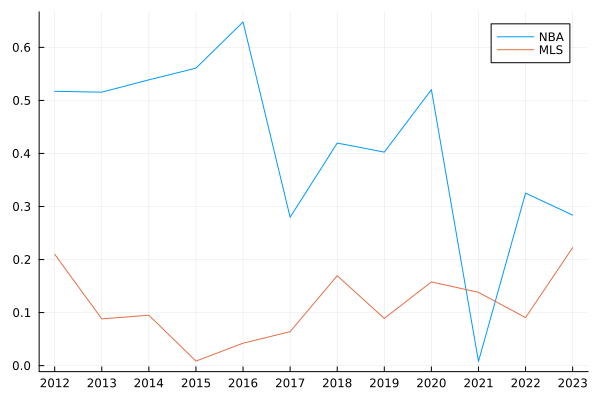

In [238]:
@df subset(masterTableBasketball,:League => (c->c.=="NBA")) plot(:Year,:Comp,mode=:none, label="NBA")
@df subset(masterTable,:Country => (c->c.=="USA"), :Division =>(d->d.==1)) plot!(:Year,:Comp,mode=:none, label="MLS")
xticks!(2011:2023)

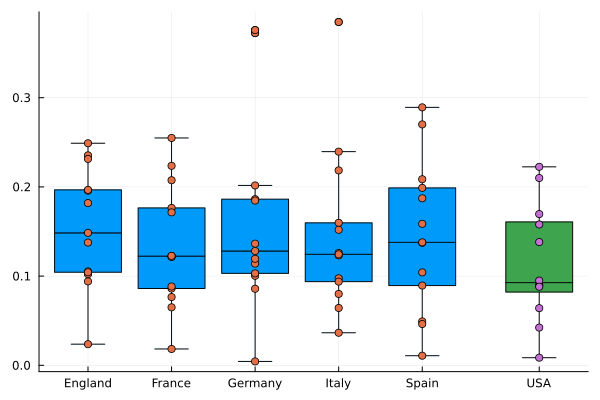

In [194]:
@df subset(masterTable, :Division =>(d->d.==2)) boxplot(:Country,:Comp,mode=:none,label="")
@df subset(masterTable, :Division =>(d->d.==2)) dotplot!(:Country,:Comp,mode=:none,side=:left,label="")
@df subset(masterTable, :Country =>(d->d.=="USA")) boxplot!(:Country,:Comp,mode=:none,label="")
@df subset(masterTable, :Country =>(d->d.=="USA")) dotplot!(:Country,:Comp,mode=:none,side=:left,label="")

## creation of American sports league tables

In [316]:
yr = ["2023" "2022" "2021" "2020" "2019" "2018" "2017" "2016" "2015" "2014" "2013" "2012" "2011" "2010" "2009" "2008" "2007" "2006" "2004"]
filecallNHL = "Data/NHL/" .* yr .* ".csv"
filecallNHL = vec(filecallNHL)
yr = [2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2004]
org = repeat(["NHL"],19)
masterTableNHL = DataFrame(League=org,Year=yr,FileName=filecallNHL)
masterTableNHL = transform(masterTableNHL,:FileName => (files->readFileSkipMissing.(files)) => :df)

19×4 DataFrame
 Row │ League  Year   FileName           df               
     │ String  Int64  String             DataFrame        
─────┼────────────────────────────────────────────────────
   1 │ NHL      2023  Data/NHL/2023.csv  1312×9 DataFrame 
   2 │ NHL      2022  Data/NHL/2022.csv  1312×9 DataFrame 
   3 │ NHL      2021  Data/NHL/2021.csv  868×9 DataFrame  
   4 │ NHL      2020  Data/NHL/2020.csv  1082×9 DataFrame 
   5 │ NHL      2019  Data/NHL/2019.csv  1271×9 DataFrame 
   6 │ NHL      2018  Data/NHL/2018.csv  1271×9 DataFrame 
   7 │ NHL      2017  Data/NHL/2017.csv  1230×9 DataFrame 
   8 │ NHL      2016  Data/NHL/2016.csv  1230×9 DataFrame 
   9 │ NHL      2015  Data/NHL/2015.csv  1230×9 DataFrame 
  10 │ NHL      2014  Data/NHL/2014.csv  1231×9 DataFrame 
  11 │ NHL      2013  Data/NHL/2013.csv  720×9 DataFrame  
  12 │ NHL      2012  Data/NHL/2012.csv  1230×9 DataFrame 
  13 │ NHL      2011  Data/NHL/2011.csv  1230×9 DataFrame 
  14 │ NHL      2010  Data/NHL/2010.csv  1230×9 DataFrame 
  15 │ NHL      2009  Data/NHL/2009.csv  1230×9 DataFrame 
  16 │ NHL      2008  Data/NHL/2008.csv  1230×9 DataFrame 
  17 │ NHL      2007  Data/NHL/2007.csv  1230×9 DataFrame 
  18 │ NHL      2006  Data/NHL/2006.csv  1230×9 DataFrame 
  19 │ NHL      2004  Data/NHL/2004.csv  1230×9 DataFrame 

In [387]:
masterTableNHL = transform(masterTableNHL,:df => (d->compNHL.(d))=>[:Comp,:HFA])
masterTableNHL

19×6 DataFrame
 Row │ League  Year   FileName           df                 Comp       HFA     ⋯
     │ String  Int64  String             DataFrame          Float64    Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ NHL      2023  Data/NHL/2023.csv  1312×10 DataFrame  0.476186   0.10504 ⋯
   2 │ NHL      2022  Data/NHL/2022.csv  1312×10 DataFrame  0.473767   0.16437
   3 │ NHL      2021  Data/NHL/2021.csv  868×10 DataFrame   0.450002   0.14778
   4 │ NHL      2020  Data/NHL/2020.csv  1082×10 DataFrame  0.21725    0.14115
   5 │ NHL      2019  Data/NHL/2019.csv  1271×10 DataFrame  0.229926   0.15072 ⋯
   6 │ NHL      2018  Data/NHL/2018.csv  1271×10 DataFrame  0.301603   0.26744
   7 │ NHL      2017  Data/NHL/2017.csv  1230×10 DataFrame  0.293068   0.24877
   8 │ NHL      2016  Data/NHL/2016.csv  1230×10 DataFrame  0.229345   0.12019
   9 │ NHL      2015  Data/NHL/2015.csv  1230×10 DataFrame  0.381204   0.18044 ⋯
  10 │ NHL      2014  Data/NHL/2014.csv  1230×10 DataFrame  0.316064   0.15405
  11 │ NHL      2013  Data/NHL/2013.csv  720×10 DataFrame   0.331214   0.28958
  12 │ NHL      2012  Data/NHL/2012.csv  1230×10 DataFrame  0.214528   0.24058
  13 │ NHL      2011  Data/NHL/2011.csv  1230×10 DataFrame  0.184054   0.07615 ⋯
  14 │ NHL      2010  Data/NHL/2010.csv  1230×10 DataFrame  0.270226   0.25415
  15 │ NHL      2009  Data/NHL/2009.csv  1230×10 DataFrame  0.218954   0.24137
  16 │ NHL      2008  Data/NHL/2008.csv  1230×10 DataFrame  0.0591588  0.15040
  17 │ NHL      2007  Data/NHL/2007.csv  1230×10 DataFrame  0.33051    0.21273 ⋯
  18 │ NHL      2006  Data/NHL/2006.csv  1230×10 DataFrame  0.401283   0.31827
  19 │ NHL      2004  Data/NHL/2004.csv  1230×10 DataFrame  0.346922   0.50843
                                                                1 column omitted

In [318]:
mlb2022 = CSV.read("Data/MLB/2022.csv",DataFrame);

In [319]:
function htwMLB(x::DataFrame)
    subset!(x,:HomeTeamScore=> (x->((!ismissing).(x))))
    htw = zeros(size(x,1))
    for i in 1:size(x,1)
        if x[i,:HomeTeamScore] > x[i,:AwayTeamScore]
            htw[i] = 1
        else 
            htw[i] = 0
        end
    end
    x.HTW = htw
    return x
end

htwMLB (generic function with 1 method)

In [320]:
htwMLB(mlb2022);

In [321]:
mlb2022.HTW;

In [322]:
compMLB(mlb2022)

0.09974768953472102

In [323]:
yrs = [ "2022" "2021" "2020" "2019" "2018" "2017" "2016" "2015" "2014" "2013" "2012" "2011" "2010" "2009" "2008" "2007" "2006" "2005" "2004"]
filecallMLB = "Data/MLB/" .* yrs .* ".csv"
filecallMLB = vec(filecallMLB)
yrs = [2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004]
orgMLB = repeat(["MLB"],19)
masterTableMLB = DataFrame(League=orgMLB,Year=yrs,FileName=filecallMLB)
masterTableMLB = transform(masterTableMLB,:FileName => (files->readFileSkipMissing.(files)) => :df);

In [388]:
masterTableMLB = transform(masterTableMLB,:df => (d->compMLB.(d))=>[:Comp,:HFA])
masterTableMLB

19×6 DataFrame
 Row │ League  Year   FileName           df                  Comp      HFA     ⋯
     │ String  Int64  String             DataFrame           Float64   Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ MLB      2022  Data/MLB/2022.csv  2430×162 DataFrame  0.314236  0.13971 ⋯
   2 │ MLB      2021  Data/MLB/2021.csv  2429×162 DataFrame  0.308012  0.16474
   3 │ MLB      2020  Data/MLB/2020.csv  898×162 DataFrame   0.297617  0.23909
   4 │ MLB      2019  Data/MLB/2019.csv  2429×162 DataFrame  0.351319  0.12420
   5 │ MLB      2018  Data/MLB/2018.csv  2431×162 DataFrame  0.335308  0.11804 ⋯
   6 │ MLB      2017  Data/MLB/2017.csv  2430×162 DataFrame  0.192968  0.16315
   7 │ MLB      2016  Data/MLB/2016.csv  2428×162 DataFrame  0.191815  0.12284
   8 │ MLB      2015  Data/MLB/2015.csv  2429×162 DataFrame  0.201281  0.16944
   9 │ MLB      2014  Data/MLB/2014.csv  2430×162 DataFrame  0.181815  0.12240 ⋯
  10 │ MLB      2013  Data/MLB/2013.csv  2431×162 DataFrame  0.236834  0.15658
  11 │ MLB      2012  Data/MLB/2012.csv  2430×162 DataFrame  0.223062  0.13556
  12 │ MLB      2011  Data/MLB/2011.csv  2429×162 DataFrame  0.213412  0.10560
  13 │ MLB      2010  Data/MLB/2010.csv  2430×162 DataFrame  0.23207   0.24470 ⋯
  14 │ MLB      2009  Data/MLB/2009.csv  2430×162 DataFrame  0.234652  0.20033
  15 │ MLB      2008  Data/MLB/2008.csv  2428×162 DataFrame  0.211415  0.23119
  16 │ MLB      2007  Data/MLB/2007.csv  2431×162 DataFrame  0.129989  0.17059
  17 │ MLB      2006  Data/MLB/2006.csv  2429×162 DataFrame  0.167048  0.18975 ⋯
  18 │ MLB      2005  Data/MLB/2005.csv  2431×162 DataFrame  0.227036  0.15293
  19 │ MLB      2004  Data/MLB/2004.csv  2428×162 DataFrame  0.266634  0.14548
                                                                1 column omitted

## Plots of top 5 american leagues

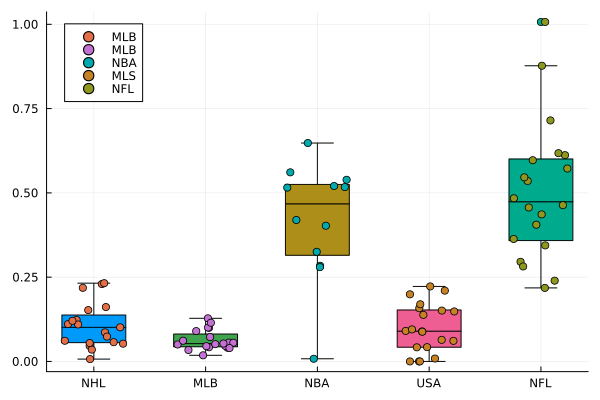

In [326]:
# @df vcat(masterTableNHL,masterTableMLB) boxplot(:League,:Comp,mode=:none,label="")
# @df vcat(masterTableNHL,masterTableMLB) dotplot!(:League,:Comp,mode=:none,side=:left,label="NHL")
@df masterTableNHL boxplot(:League,:Comp,mode=:none,label="")
@df masterTableNHL dotplot!(:League,:Comp,mode=:density,label="MLB")
@df masterTableMLB boxplot!(:League,:Comp,mode=:none,label="")
@df masterTableMLB dotplot!(:League,:Comp,mode=:density,label="MLB")
@df subset(masterTableBasketball,:League => (c->c.=="NBA")) boxplot!(:League,:Comp,mode=:none, label="")
@df subset(masterTableBasketball,:League => (c->c.=="NBA")) dotplot!(:League,:Comp,mode=:density, label="NBA")
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) boxplot!(:Country,:Comp,mode=:none,label="")
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) dotplot!(:Country,:Comp,mode=:density,label="MLS")
@df masterTableNFL boxplot!(:League,:Comp,mode=:none,label="")
@df masterTableNFL dotplot!(:League,:Comp,side=:both,mode=:density,label="NFL")

In [172]:
vcat(masterTableNHL,masterTableMLB)

38×5 DataFrame
 Row │ League  Year   FileName           df                  Comp      
     │ String  Int64  String             DataFrame           Float64   
─────┼─────────────────────────────────────────────────────────────────
   1 │ NHL      2023  Data/NHL/2023.csv  1312×10 DataFrame   0.229523
   2 │ NHL      2022  Data/NHL/2022.csv  1312×10 DataFrame   0.232083
   3 │ NHL      2021  Data/NHL/2021.csv  868×10 DataFrame    0.21834
   4 │ NHL      2020  Data/NHL/2020.csv  1082×10 DataFrame   0.0613079
   5 │ NHL      2019  Data/NHL/2019.csv  1271×10 DataFrame   0.0570301
   6 │ NHL      2018  Data/NHL/2018.csv  1271×10 DataFrame   0.110672
   7 │ NHL      2017  Data/NHL/2017.csv  1230×10 DataFrame   0.0861688
   8 │ NHL      2016  Data/NHL/2016.csv  1230×10 DataFrame   0.0526884
   9 │ NHL      2015  Data/NHL/2015.csv  1230×10 DataFrame   0.152226
  10 │ NHL      2014  Data/NHL/2014.csv  1230×10 DataFrame   0.101133
  11 │ NHL      2013  Data/NHL/2013.csv  720×10 DataFrame    0.123011
  ⋮  │   ⋮       ⋮            ⋮                  ⋮               ⋮
  29 │ MLB      2013  Data/MLB/2013.csv  2431×162 DataFrame  0.0614702
  30 │ MLB      2012  Data/MLB/2012.csv  2430×162 DataFrame  0.0512698
  31 │ MLB      2011  Data/MLB/2011.csv  2429×162 DataFrame  0.0462154
  32 │ MLB      2010  Data/MLB/2010.csv  2430×162 DataFrame  0.0557675
  33 │ MLB      2009  Data/MLB/2009.csv  2430×162 DataFrame  0.0554331
  34 │ MLB      2008  Data/MLB/2008.csv  2428×162 DataFrame  0.04518
  35 │ MLB      2007  Data/MLB/2007.csv  2431×162 DataFrame  0.0181443
  36 │ MLB      2006  Data/MLB/2006.csv  2429×162 DataFrame  0.039689
  37 │ MLB      2005  Data/MLB/2005.csv  2431×162 DataFrame  0.0530703
  38 │ MLB      2004  Data/MLB/2004.csv  2428×162 DataFrame  0.0723532
                                                        17 rows omitted

In [173]:
names(masterTableMLB)

5-element Vector{String}:
 "League"
 "Year"
 "FileName"
 "df"
 "Comp"

In [174]:
yr = ["2023" "2022" "2021" "2020" "2019" "2018" "2017" "2016" "2015" "2014" "2013" "2012" "2011" "2010" "2009" "2008" "2007" "2006" "2005" "2004"]
filecallNFL = "Data/NFL/" .* yr .* ".csv"
filecallNFL = vec(filecallNFL)
yr = [2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004]
org = repeat(["NFL"],20)
masterTableNFL = DataFrame(League=org,Year=yr,FileName=filecallNFL)
masterTableNFL = transform(masterTableNFL,:FileName => (files->readFileSkipMissing.(files)) => :df);

In [389]:
masterTableNFL = transform(masterTableNFL,:df => (d->compNFL.(d))=>[:Comp,:HFA])
masterTableNFL

20×6 DataFrame
 Row │ League  Year   FileName           df                Comp      HFA       ⋯
     │ String  Int64  String             DataFrame         Float64   Float64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ NFL      2023  Data/NFL/2023.csv  271×14 DataFrame  0.47987   0.272243  ⋯
   2 │ NFL      2022  Data/NFL/2022.csv  272×14 DataFrame  0.512548  0.090773
   3 │ NFL      2021  Data/NFL/2021.csv  256×14 DataFrame  0.781605  0.0043204
   4 │ NFL      2020  Data/NFL/2020.csv  256×14 DataFrame  0.616227  0.0712337
   5 │ NFL      2019  Data/NFL/2019.csv  256×14 DataFrame  0.602379  0.460792  ⋯
   6 │ NFL      2018  Data/NFL/2018.csv  256×14 DataFrame  0.657847  0.323368
   7 │ NFL      2017  Data/NFL/2017.csv  256×14 DataFrame  0.755128  0.371047
   8 │ NFL      2016  Data/NFL/2016.csv  256×14 DataFrame  0.527259  0.176905
   9 │ NFL      2015  Data/NFL/2015.csv  256×14 DataFrame  0.701141  0.349332  ⋯
  10 │ NFL      2014  Data/NFL/2014.csv  256×14 DataFrame  0.667247  0.477919
  11 │ NFL      2013  Data/NFL/2013.csv  256×14 DataFrame  0.56656   0.347616
  12 │ NFL      2012  Data/NFL/2012.csv  256×14 DataFrame  0.781223  0.346526
  13 │ NFL      2011  Data/NFL/2011.csv  256×14 DataFrame  0.66469   0.285375  ⋯
  14 │ NFL      2010  Data/NFL/2010.csv  256×14 DataFrame  0.733531  0.3458
  15 │ NFL      2009  Data/NFL/2009.csv  256×14 DataFrame  0.731652  0.34474
  16 │ NFL      2008  Data/NFL/2008.csv  256×14 DataFrame  1.00239   0.403131
  17 │ NFL      2007  Data/NFL/2007.csv  256×14 DataFrame  0.439391  0.138857  ⋯
  18 │ NFL      2006  Data/NFL/2006.csv  256×14 DataFrame  0.932394  0.503181
  19 │ NFL      2005  Data/NFL/2005.csv  256×14 DataFrame  0.651389  0.322525
  20 │ NFL      2004  Data/NFL/2004.csv  256×14 DataFrame  0.844079  0.60906
                                                                1 column omitted

In [396]:
yr = ["2023" "2022" "2021" "2020" "2019" "2018" "2017" "2016" "2015" "2014" "2013" "2012" "2011" "2010" "2009" "2008" "2007" "2006" "2005" "2004"]
filecallNBA = "Data/Basketball/NBA/" .* yr .* ".csv"
filecallNBA = vec(filecallNBA)
yr = [2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004]
org = repeat(["NBA"],20)
masterTableNBA = DataFrame(League=org,Year=yr,FileName=filecallNBA)
masterTableNBA = transform(masterTableNBA,:FileName => (files->readFileSkipMissingBasket.(files)) => :df);
masterTableNBA = transform(masterTableNBA,:df => (d->compBasket.(d))=>[:Comp,:HFA])
masterTableNBA

20×6 DataFrame
 Row │ League  Year   FileName                      df                 Comp    ⋯
     │ String  Int64  String                        DataFrame          Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ NBA      2023  Data/Basketball/NBA/2023.csv  1230×12 DataFrame  0.52384 ⋯
   2 │ NBA      2022  Data/Basketball/NBA/2022.csv  1230×12 DataFrame  0.57024
   3 │ NBA      2021  Data/Basketball/NBA/2021.csv  1081×12 DataFrame  0.06288
   4 │ NBA      2020  Data/Basketball/NBA/2020.csv  1059×12 DataFrame  0.71873
   5 │ NBA      2019  Data/Basketball/NBA/2019.csv  1230×12 DataFrame  0.63069 ⋯
   6 │ NBA      2018  Data/Basketball/NBA/2018.csv  1230×12 DataFrame  0.64778
   7 │ NBA      2017  Data/Basketball/NBA/2017.csv  1230×12 DataFrame  0.52874
   8 │ NBA      2016  Data/Basketball/NBA/2016.csv  1230×12 DataFrame  0.80099
   9 │ NBA      2015  Data/Basketball/NBA/2015.csv  1230×12 DataFrame  0.73984 ⋯
  10 │ NBA      2014  Data/Basketball/NBA/2014.csv  1230×12 DataFrame  0.73356
  11 │ NBA      2013  Data/Basketball/NBA/2013.csv  1229×12 DataFrame  0.71593
  12 │ NBA      2012  Data/Basketball/NBA/2012.csv  990×12 DataFrame   0.70943
  13 │ NBA      2011  Data/Basketball/NBA/2011.csv  1230×12 DataFrame  0.77636 ⋯
  14 │ NBA      2010  Data/Basketball/NBA/2010.csv  1230×12 DataFrame  0.77985
  15 │ NBA      2009  Data/Basketball/NBA/2009.csv  1230×12 DataFrame  0.82837
  16 │ NBA      2008  Data/Basketball/NBA/2008.csv  1230×12 DataFrame  0.81640
  17 │ NBA      2007  Data/Basketball/NBA/2007.csv  1230×12 DataFrame  0.53301 ⋯
  18 │ NBA      2006  Data/Basketball/NBA/2006.csv  1230×12 DataFrame  0.56663
  19 │ NBA      2005  Data/Basketball/NBA/2005.csv  1230×12 DataFrame  0.72807
  20 │ NBA      2004  Data/Basketball/NBA/2004.csv  1189×12 DataFrame  0.60364
                                                               2 columns omitted

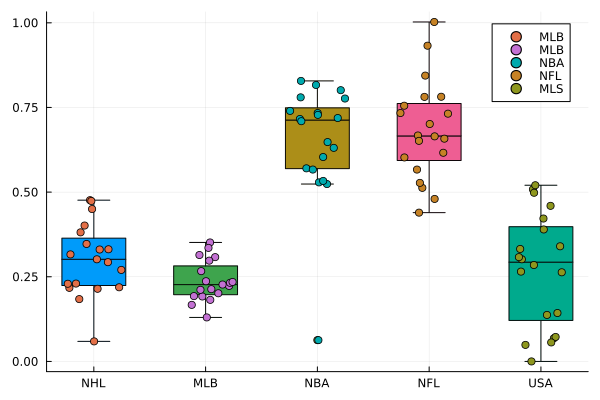

In [446]:
@df masterTableNHL boxplot(:League,:Comp,mode=:none,label="")
@df masterTableNHL dotplot!(:League,:Comp,mode=:density,label="MLB")
@df masterTableMLB boxplot!(:League,:Comp,mode=:none,label="")
@df masterTableMLB dotplot!(:League,:Comp,mode=:density,label="MLB")
@df masterTableNBA boxplot!(:League,:Comp,mode=:none, label="")
@df masterTableNBA dotplot!(:League,:Comp,mode=:density, label="NBA")
@df masterTableNFL boxplot!(:League,:Comp,mode=:none,label="")
@df masterTableNFL dotplot!(:League,:Comp,side=:both,mode=:density,label="NFL")
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) boxplot!(:Country,:Comp,mode=:none,label="")
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) dotplot!(:Country,:Comp,mode=:density,label="MLS")

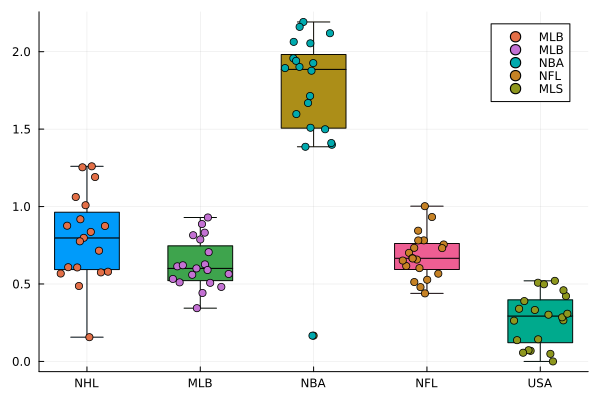

In [448]:
@df masterTableNHL boxplot(:League,:Comp*sqrt(7),mode=:none,label="")
@df masterTableNHL dotplot!(:League,:Comp*sqrt(7),mode=:density,label="MLB")
@df masterTableMLB boxplot!(:League,:Comp*sqrt(7),mode=:none,label="")
@df masterTableMLB dotplot!(:League,:Comp*sqrt(7),mode=:density,label="MLB")
@df masterTableNBA boxplot!(:League,:Comp*sqrt(7),mode=:none, label="")
@df masterTableNBA dotplot!(:League,:Comp*sqrt(7),mode=:density, label="NBA")
@df masterTableNFL boxplot!(:League,:Comp,mode=:none,label="")
@df masterTableNFL dotplot!(:League,:Comp,side=:both,mode=:density,label="NFL")
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) boxplot!(:Country,:Comp,mode=:none,label="")
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) dotplot!(:Country,:Comp,mode=:density,label="MLS")

## Plot of competitiveness and home field advantage across top soccer leagues

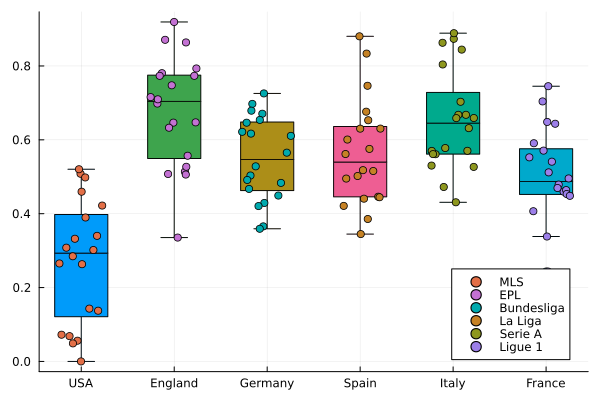

In [431]:
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) boxplot(:Country,:Comp,mode=:none,label="")
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) dotplot!(:Country,:Comp,mode=:density,label="MLS")
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==1)) boxplot!(:Country,:Comp,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==1)) dotplot!(:Country,:Comp,mode=:density, label="EPL")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) boxplot!(:Country,:Comp,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) dotplot!(:Country,:Comp,mode=:density, label="Bundesliga")
@df subset(masterTableSoccer,:Country => (c->c.=="Spain"), :Division =>(d->d.==1)) boxplot!(:Country,:Comp,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Spain"), :Division =>(d->d.==1)) dotplot!(:Country,:Comp,mode=:density, label="La Liga")
@df subset(masterTableSoccer,:Country => (c->c.=="Italy"), :Division =>(d->d.==1)) boxplot!(:Country,:Comp,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Italy"), :Division =>(d->d.==1)) dotplot!(:Country,:Comp,mode=:density, label="Serie A")
@df subset(masterTableSoccer,:Country => (c->c.=="France"), :Division =>(d->d.==1)) boxplot!(:Country,:Comp,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="France"), :Division =>(d->d.==1)) dotplot!(:Country,:Comp,mode=:density, label="Ligue 1")


What are we seeing here?

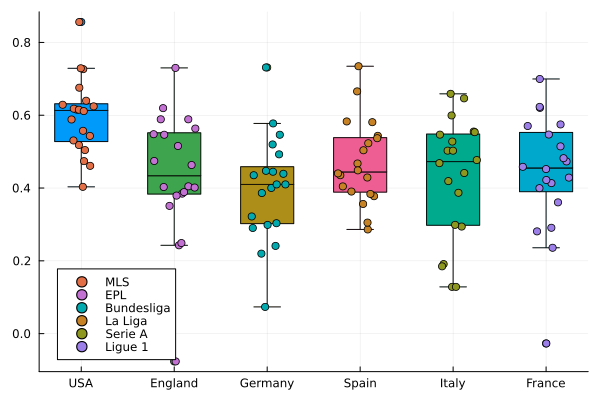

In [432]:
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) boxplot(:Country,:HFA,mode=:none,label="")
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) dotplot!(:Country,:HFA,mode=:density,label="MLS")
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==1)) boxplot!(:Country,:HFA,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==1)) dotplot!(:Country,:HFA,mode=:density, label="EPL")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) boxplot!(:Country,:HFA,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==1)) dotplot!(:Country,:HFA,mode=:density, label="Bundesliga")
@df subset(masterTableSoccer,:Country => (c->c.=="Spain"), :Division =>(d->d.==1)) boxplot!(:Country,:HFA,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Spain"), :Division =>(d->d.==1)) dotplot!(:Country,:HFA,mode=:density, label="La Liga")
@df subset(masterTableSoccer,:Country => (c->c.=="Italy"), :Division =>(d->d.==1)) boxplot!(:Country,:HFA,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Italy"), :Division =>(d->d.==1)) dotplot!(:Country,:HFA,mode=:density, label="Serie A")
@df subset(masterTableSoccer,:Country => (c->c.=="France"), :Division =>(d->d.==1)) boxplot!(:Country,:HFA,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="France"), :Division =>(d->d.==1)) dotplot!(:Country,:HFA,mode=:density, label="Ligue 1")


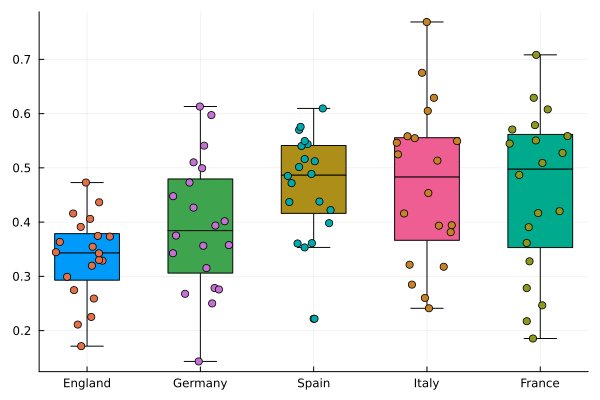

In [433]:
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==2)) boxplot(:Country,:HFA,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="England"), :Division =>(d->d.==2)) dotplot!(:Country,:HFA,mode=:density, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==2)) boxplot!(:Country,:HFA,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Germany"), :Division =>(d->d.==2)) dotplot!(:Country,:HFA,mode=:density, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Spain"), :Division =>(d->d.==2)) boxplot!(:Country,:HFA,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Spain"), :Division =>(d->d.==2)) dotplot!(:Country,:HFA,mode=:density, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Italy"), :Division =>(d->d.==2)) boxplot!(:Country,:HFA,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="Italy"), :Division =>(d->d.==2)) dotplot!(:Country,:HFA,mode=:density, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="France"), :Division =>(d->d.==2)) boxplot!(:Country,:HFA,mode=:none, label="")
@df subset(masterTableSoccer,:Country => (c->c.=="France"), :Division =>(d->d.==2)) dotplot!(:Country,:HFA,mode=:density, label="")

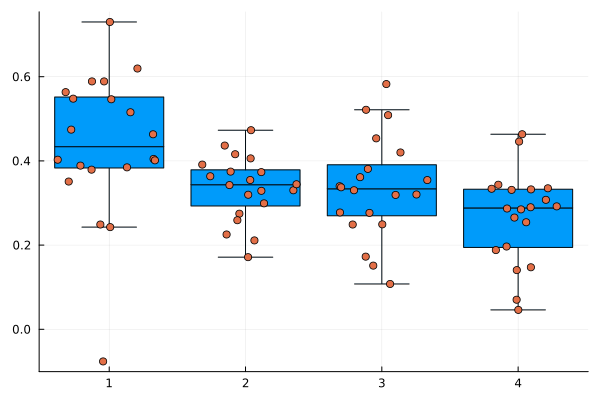

In [434]:
@df subset(masterTableSoccer,:Country => (c->c.=="England")) boxplot(:Division,:HFA,mode=:none, outliers=false,label="")
@df subset(masterTableSoccer,:Country => (c->c.=="England")) dotplot!(:Division,:HFA,mode=:density, label="")

In [436]:
subset(masterTableSoccer, :HFA =>(d->d.>.5))

89×7 DataFrame
 Row │ Country  Division  Year   FileName                        df            ⋯
     │ String   Int64     Int64  String                          DataFrame     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ England         1   2023  Data/Soccer/England/1/2023.csv  380×109 DataF ⋯
   2 │ USA             1   2023  Data/Soccer/USA/1/2023.csv      279×22 DataFr
   3 │ Spain           2   2023  Data/Soccer/Spain/2/2023.csv    462×108 DataF
   4 │ USA             1   2022  Data/Soccer/USA/1/2022.csv      476×22 DataFr
   5 │ USA             1   2021  Data/Soccer/USA/1/2021.csv      459×22 DataFr ⋯
   6 │ France          1   2020  Data/Soccer/France/1/2020.csv   279×108 DataF
   7 │ Spain           1   2020  Data/Soccer/Spain/1/2020.csv    380×108 DataF
   8 │ England         3   2020  Data/Soccer/England/3/2020.csv  400×109 DataF
   9 │ USA             1   2019  Data/Soccer/USA/1/2019.csv      408×22 DataFr ⋯
  10 │ Italy           2   2019  Data/Soccer/Italy/2/2019.csv    342×64 DataFr
  11 │ Spain           2   2019  Data/Soccer/Spain/2/2019.csv    462×64 DataFr
  ⋮  │    ⋮        ⋮        ⋮                  ⋮                         ⋮     ⋱
  80 │ Spain           1   2005  Data/Soccer/Spain/1/2005.csv    380×53 DataFr
  81 │ France          2   2005  Data/Soccer/France/2/2005.csv   380×53 DataFr ⋯
  82 │ Germany         2   2005  Data/Soccer/Germany/2/2005.csv  306×49 DataFr
  83 │ Italy           2   2005  Data/Soccer/Italy/2/2005.csv    462×53 DataFr
  84 │ France          1   2004  Data/Soccer/France/1/2004.csv   380×54 DataFr
  85 │ Germany         1   2004  Data/Soccer/Germany/1/2004.csv  306×67 DataFr ⋯
  86 │ USA             1   2004  Data/Soccer/USA/1/2004.csv      158×211 DataF
  87 │ France          2   2004  Data/Soccer/France/2/2004.csv   380×51 DataFr
  88 │ Italy           2   2004  Data/Soccer/Italy/2/2004.csv    552×55 DataFr
  89 │ England         3   2004  Data/Soccer/England/3/2004.csv  552×57 DataFr ⋯
                                                   3 columns and 68 rows omitted

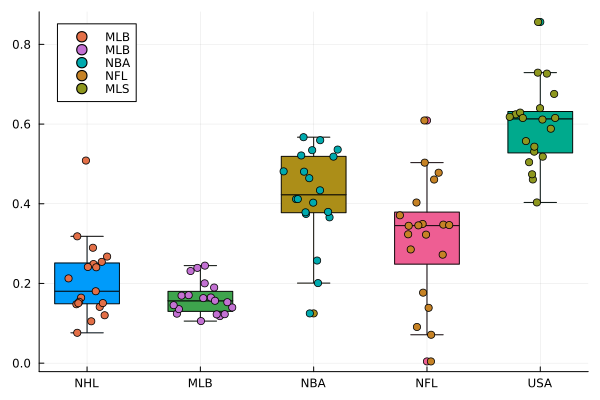

In [445]:
@df masterTableNHL boxplot(:League,:HFA,mode=:none,outliers=false,label="")
@df masterTableNHL dotplot!(:League,:HFA,mode=:density,label="MLB")
@df masterTableMLB boxplot!(:League,:HFA,mode=:none,label="")
@df masterTableMLB dotplot!(:League,:HFA,mode=:density,label="MLB")
@df masterTableNBA boxplot!(:League,:HFA,mode=:none, label="")
@df masterTableNBA dotplot!(:League,:HFA,mode=:density, label="NBA")
@df masterTableNFL boxplot!(:League,:HFA,mode=:none,label="")
@df masterTableNFL dotplot!(:League,:HFA,side=:both,mode=:density,label="NFL")
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) boxplot!(:Country,:HFA,mode=:none,label="")
@df subset(masterTableSoccer, :Country =>(d->d.=="USA")) dotplot!(:Country,:HFA,mode=:density,label="MLS")

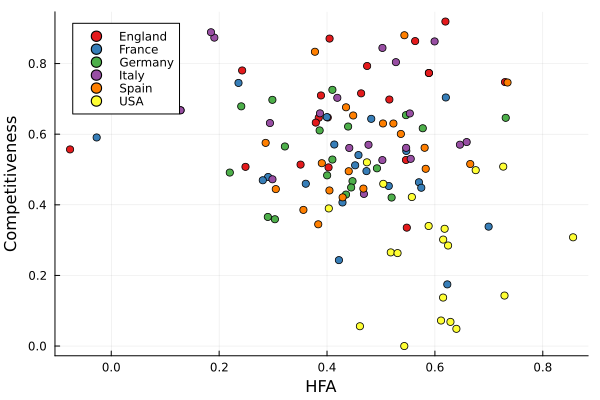

In [442]:
@df subset(masterTableSoccer,:Division =>(d->d.==1)) scatter(:HFA,:Comp,group=:Country,
           xlabel="HFA",ylabel="Competitiveness",palette=:Set1_6)

In [403]:
using Distributions

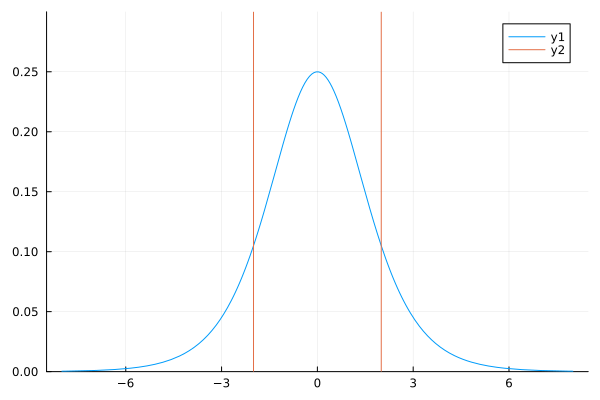

In [410]:
plot(x->pdf(Logistic(),x),-8,8,ylim=(0,0.3))
vline!([-2,2])

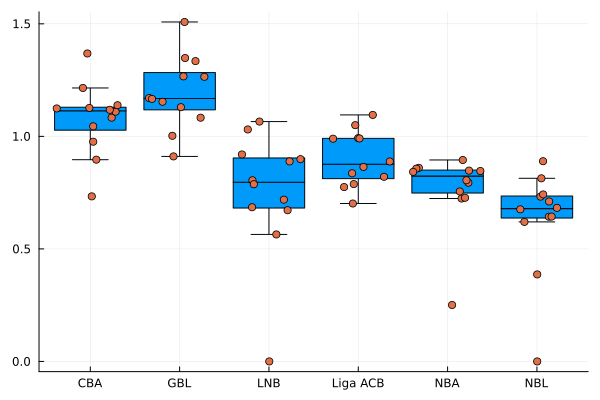

In [454]:
@df masterTableBasketball boxplot(:League,sqrt.(:Comp),mode=:none, outliers=false,label="")
@df masterTableBasketball dotplot!(:League,sqrt.(:Comp),mode=:density, label="")

In [455]:
subset(masterTableBasketball,:Comp =>(d->d.<.01))

2×6 DataFrame
 Row │ League  Year   FileName                      df                Comp     ⋯
     │ String  Int64  String                        DataFrame         Float64  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ NBL      2017  Data/Basketball/NBL/2017.csv  112×10 DataFrame      0.0  ⋯
   2 │ LNB      2013  Data/Basketball/LNB/2013.csv  240×10 DataFrame      0.0
                                                                1 column omitted